In [1]:
import matplotlib.pyplot as plt
import numpy as np

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

def live_plotter(x_vec,y1_data,line1,identifier='',pause_time=0.1):
    if line1==[]:
        # this is the call to matplotlib that allows dynamic plotting
        plt.ion()
        fig = plt.figure(figsize=(13,6))
        ax = fig.add_subplot(111)
        # create a variable for the line so we can later update it
        line1, = ax.plot(x_vec,y1_data,'-o',alpha=0.8)        
        #update plot label/title
        plt.ylabel('Y Label')
        plt.title('Title: {}'.format(identifier))
        plt.show()
    
    # after the figure, axis, and line are created, we only need to update the y-data
    line1.set_ydata(y1_data)
    # adjust limits if new data goes beyond bounds
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])
    # this pauses the data so the figure/axis can catch up - the amount of pause can be altered above
    plt.pause(pause_time)
    
    # return line so we can update it again in the next iteration
    return line1

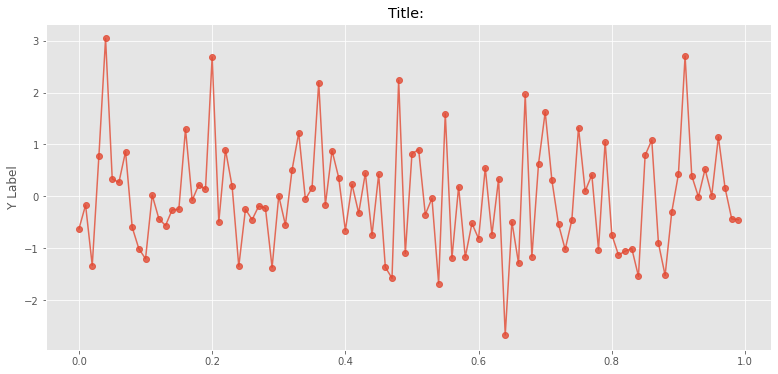

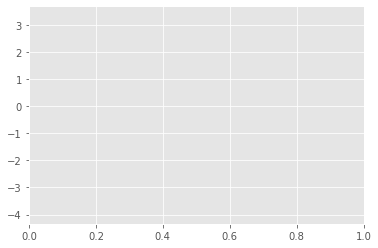

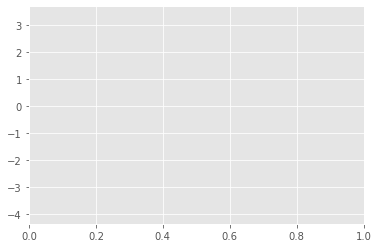

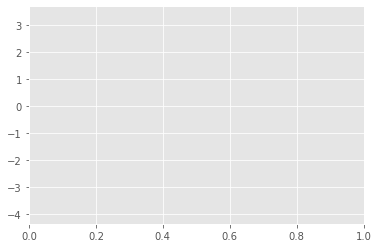

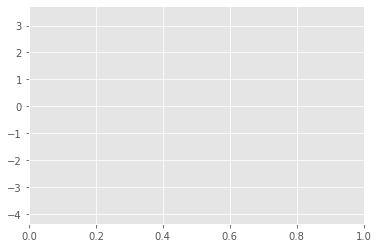

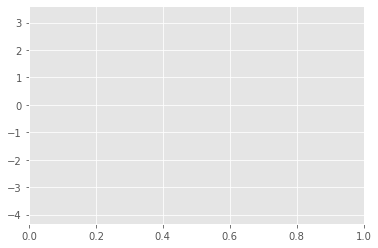

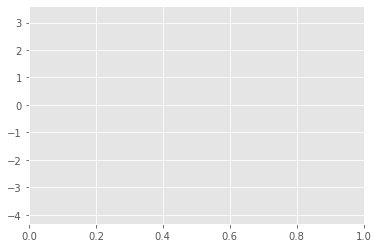

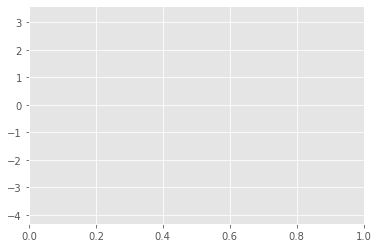

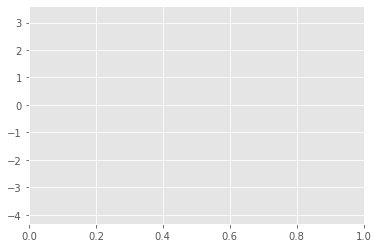

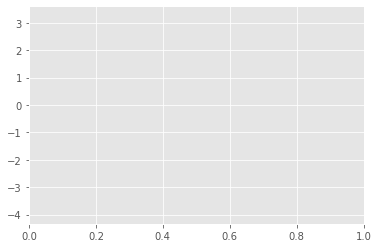

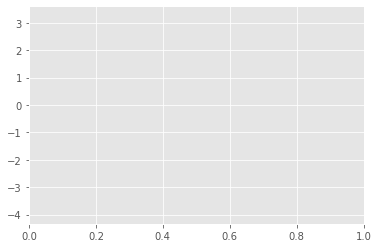

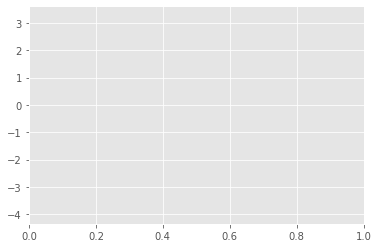

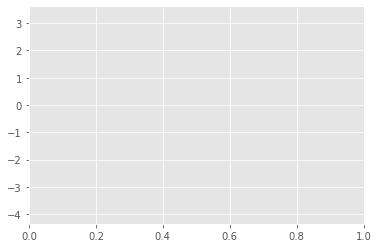

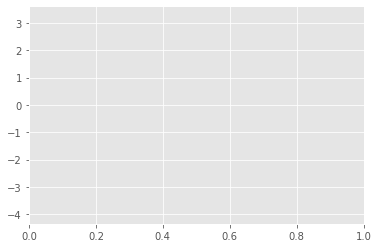

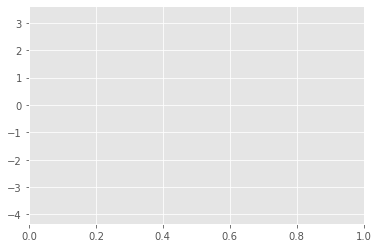

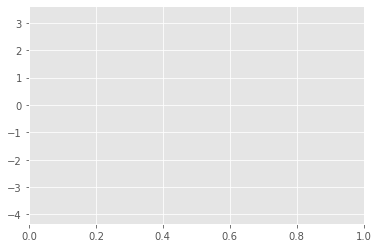

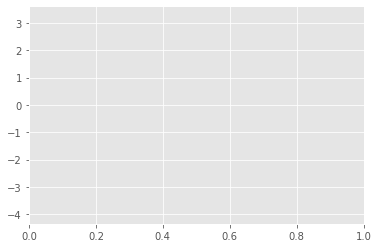

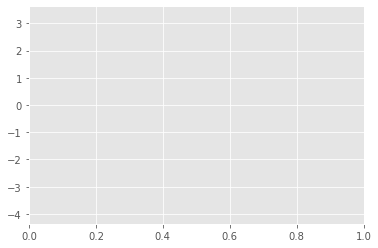

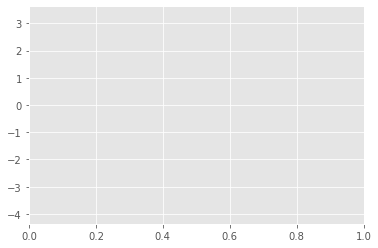

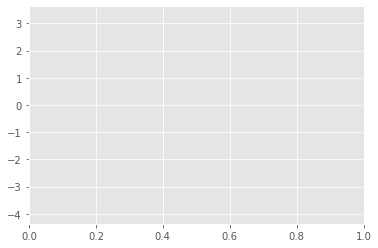

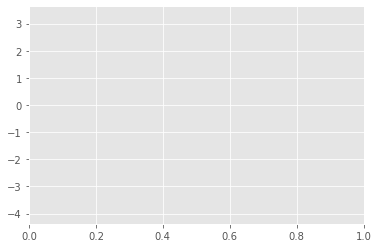

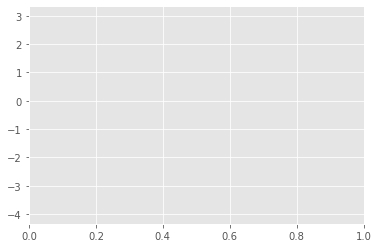

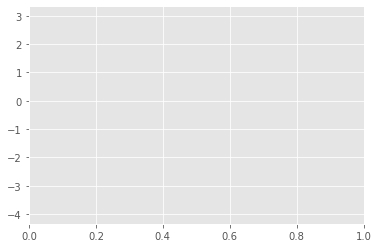

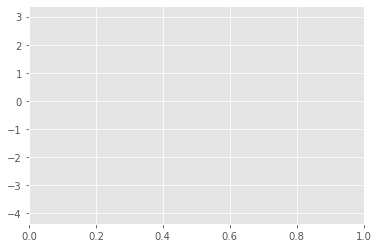

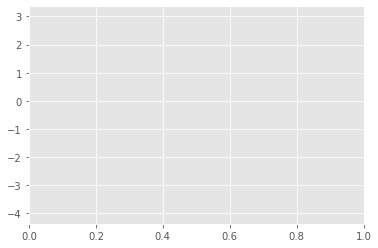

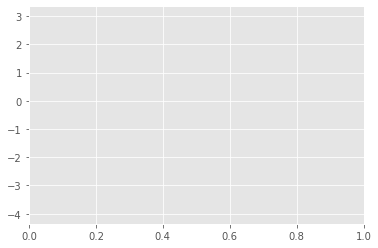

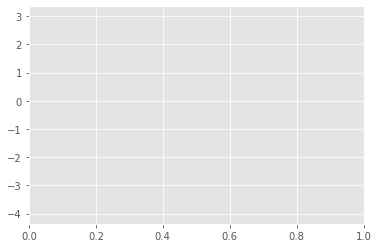

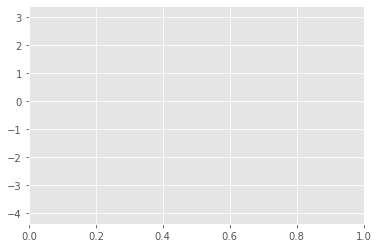

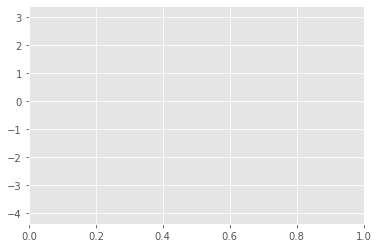

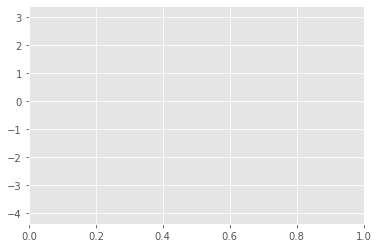

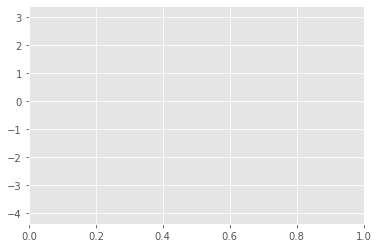

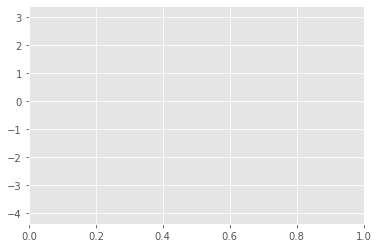

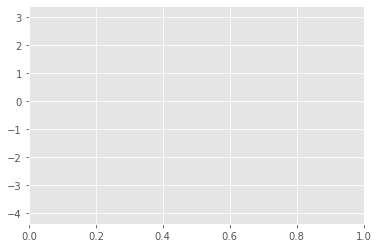

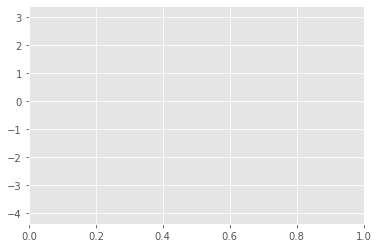

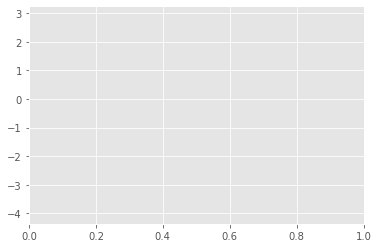

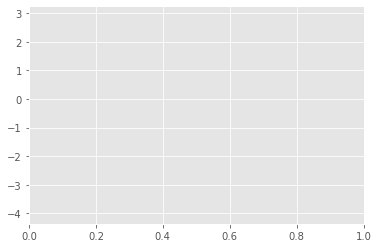

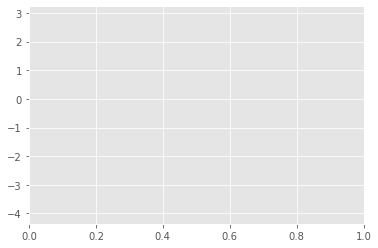

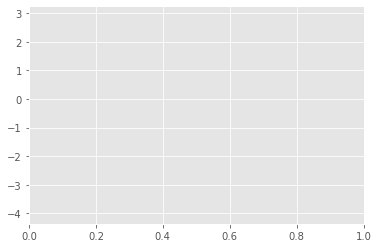

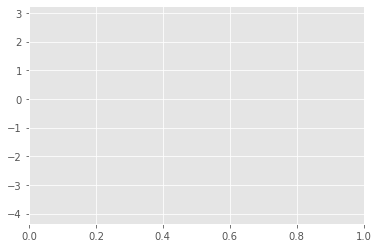

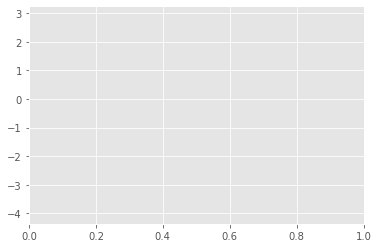

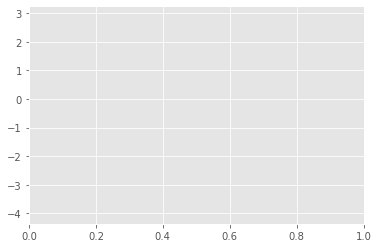

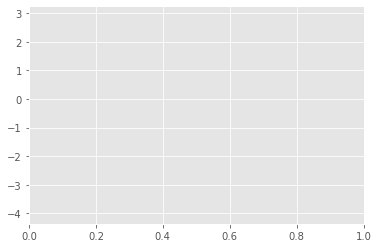

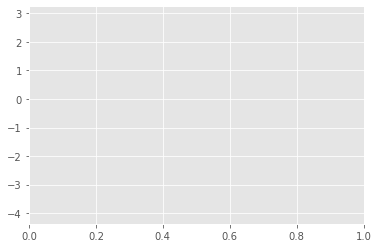

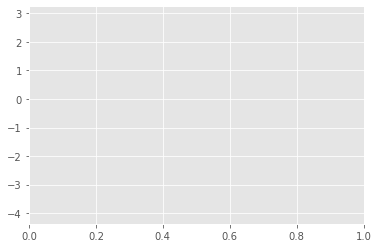

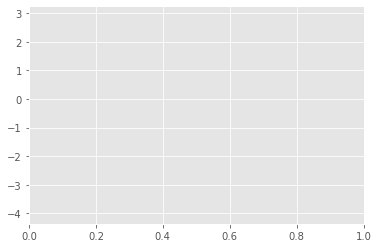

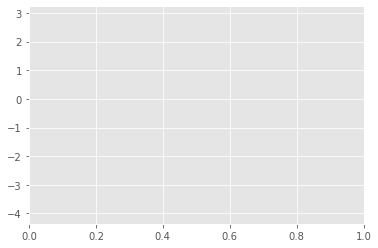

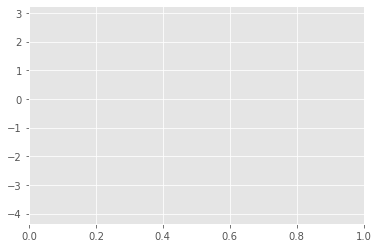

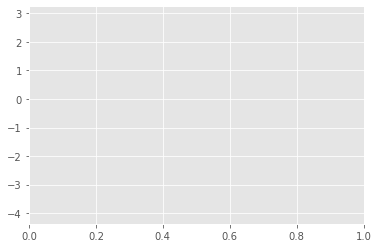

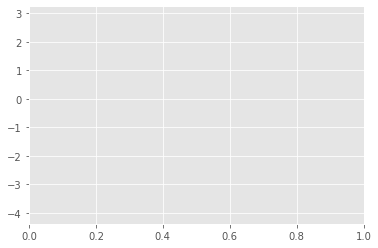

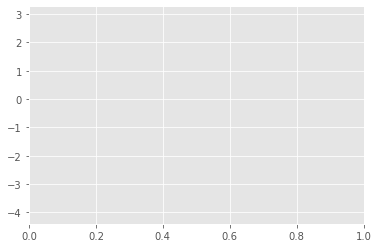

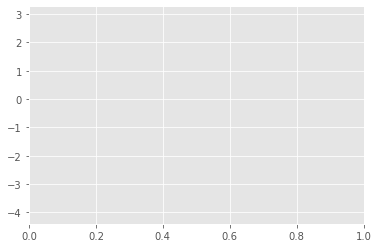

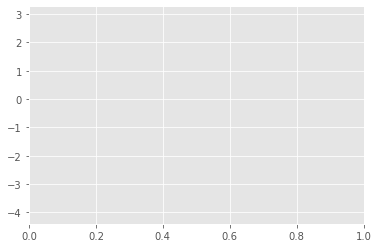

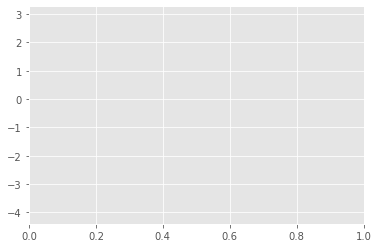

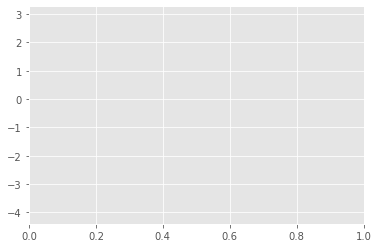

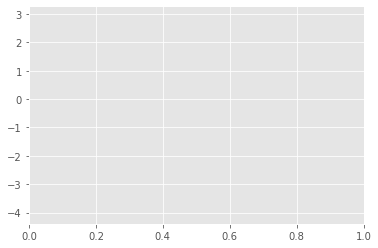

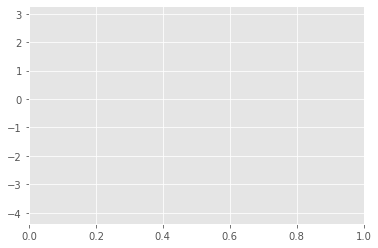

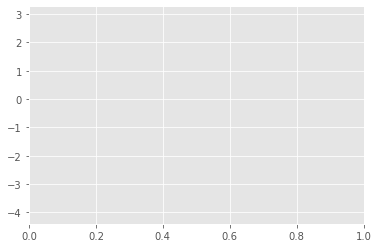

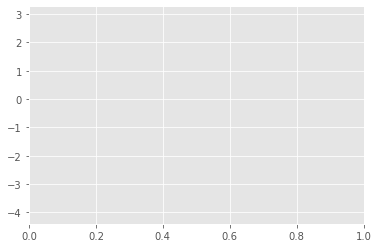

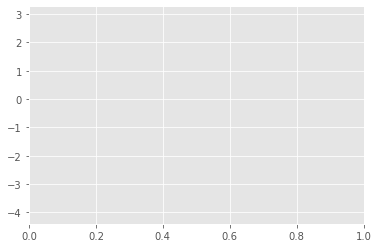

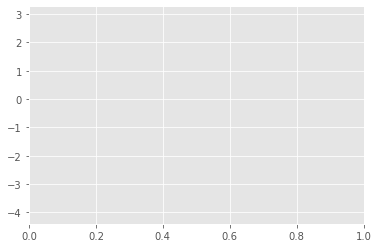

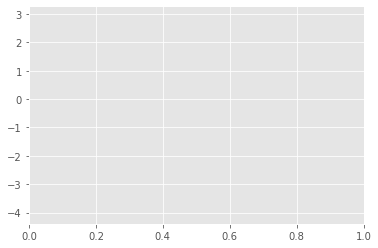

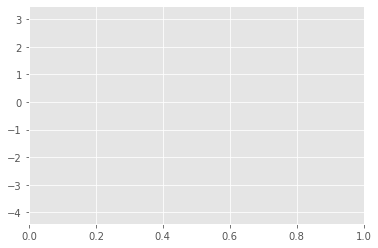

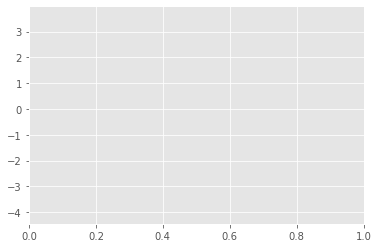

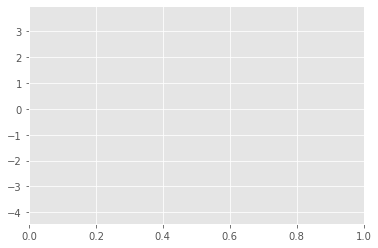

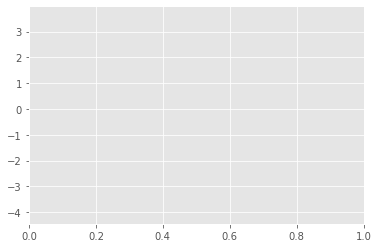

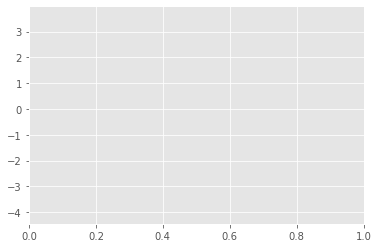

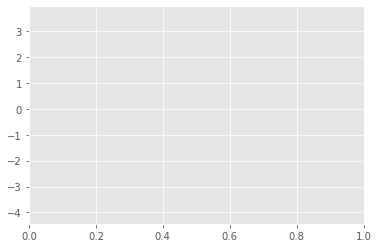

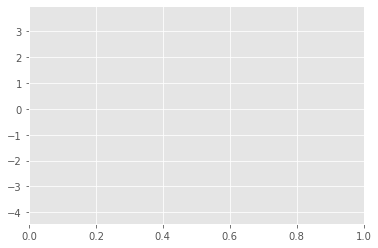

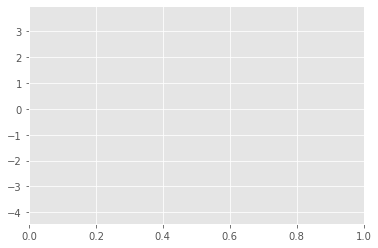

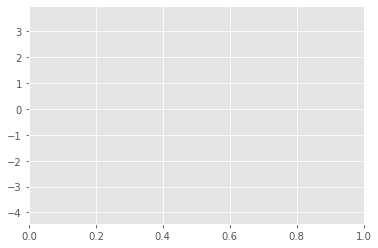

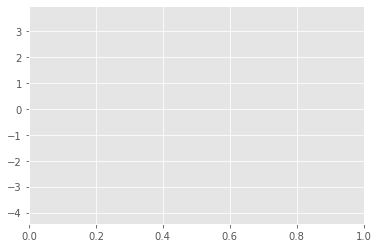

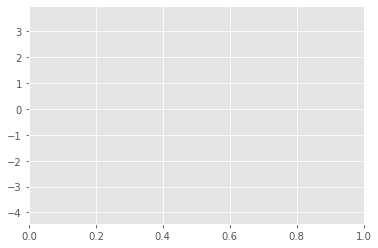

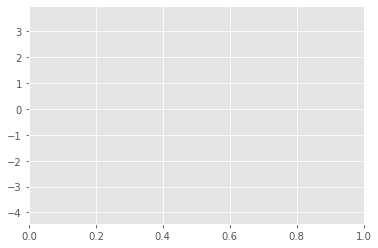

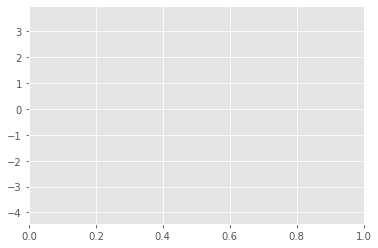

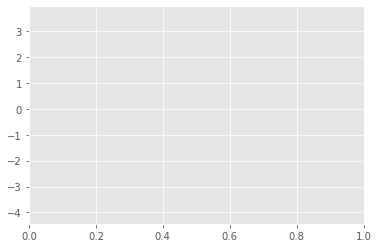

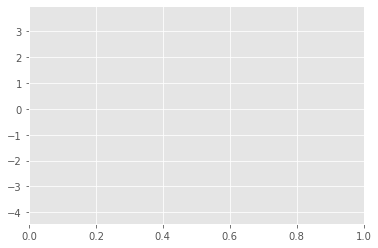

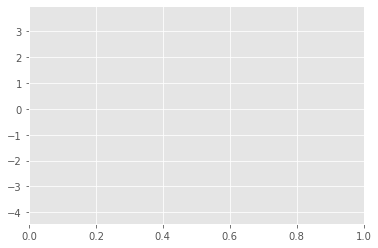

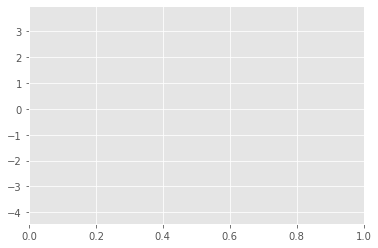

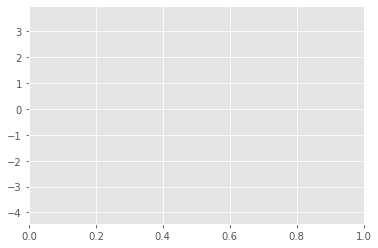

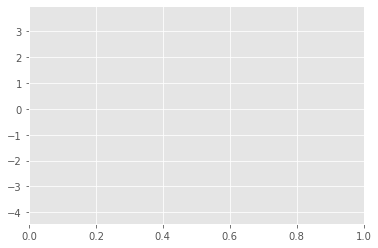

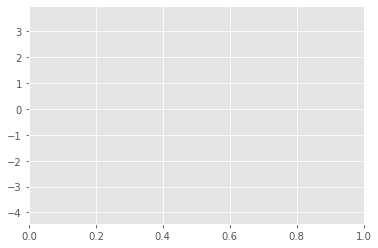

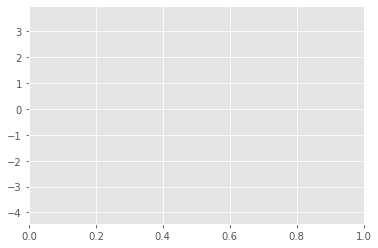

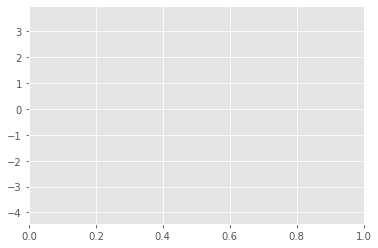

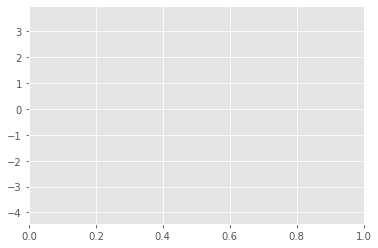

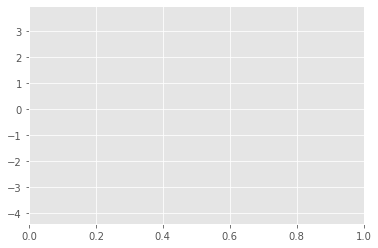

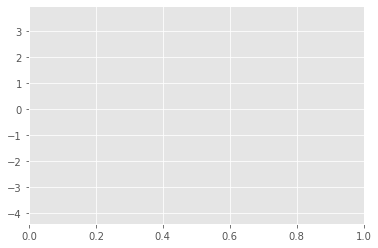

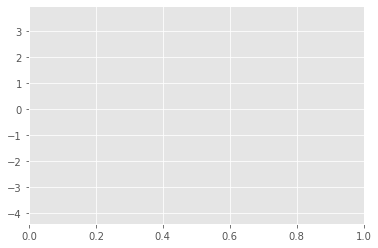

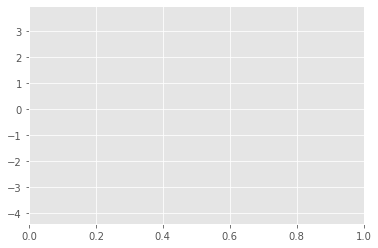

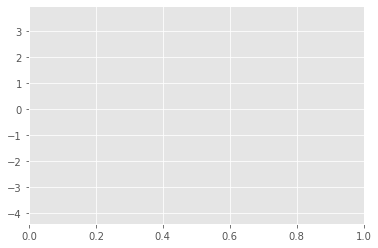

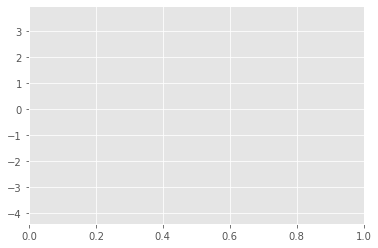

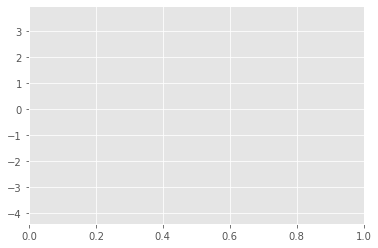

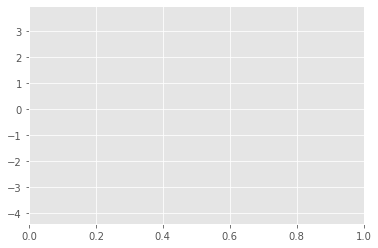

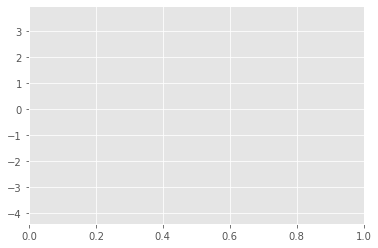

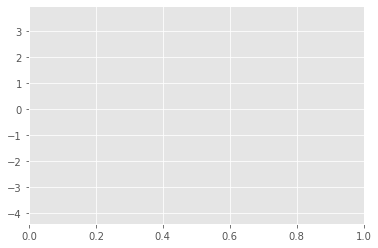

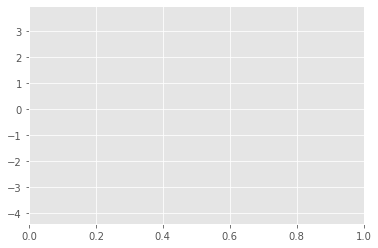

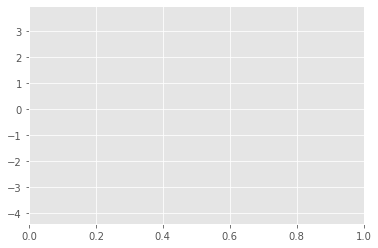

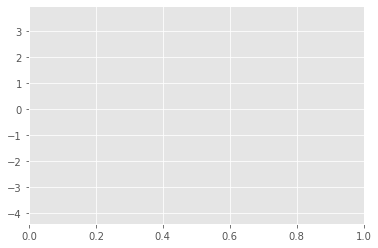

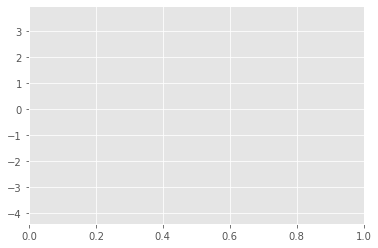

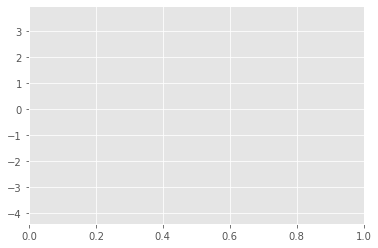

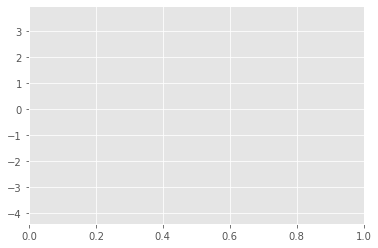

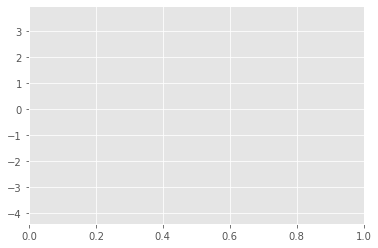

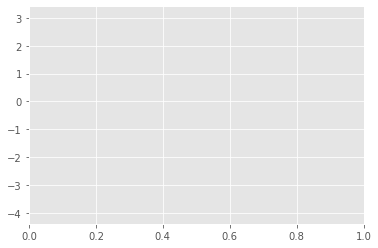

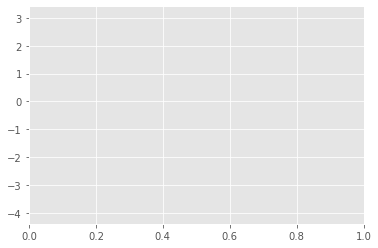

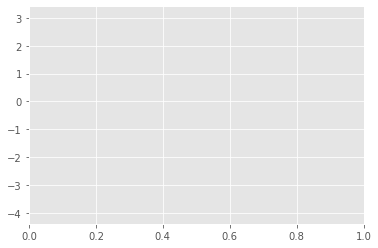

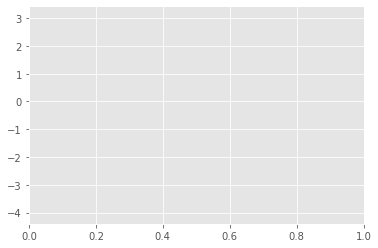

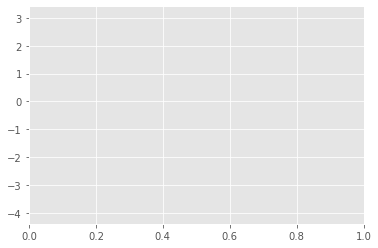

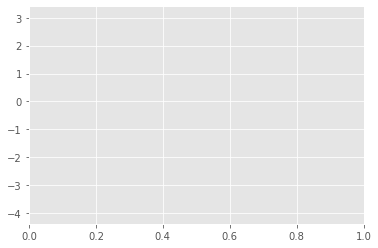

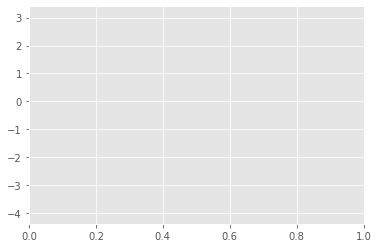

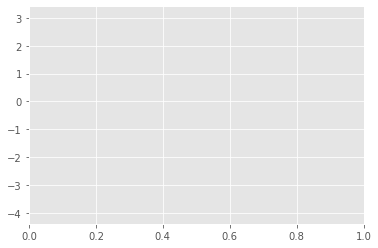

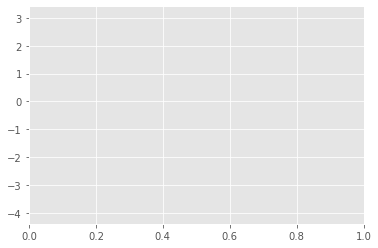

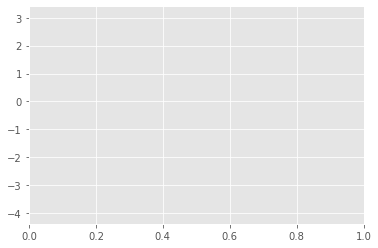

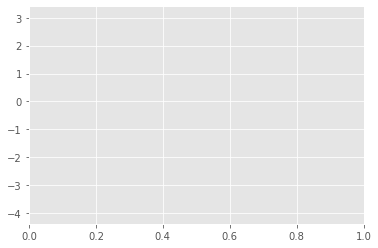

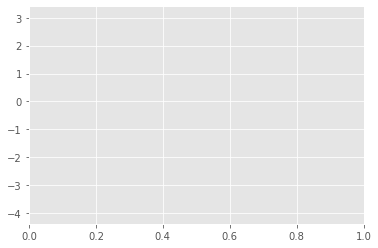

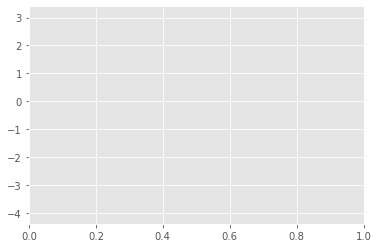

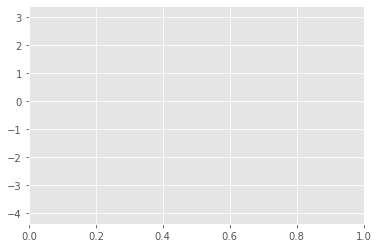

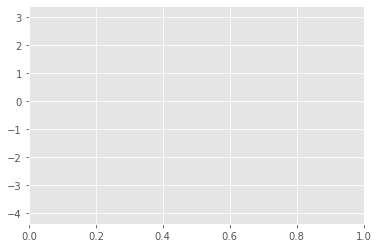

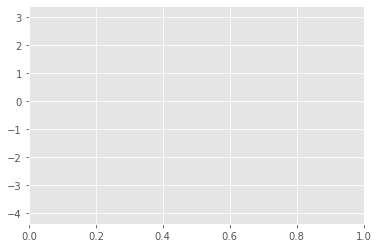

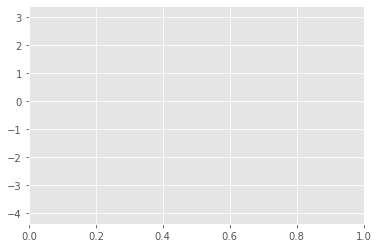

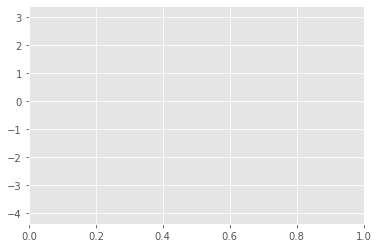

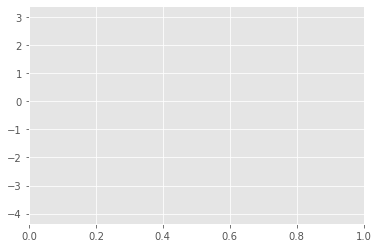

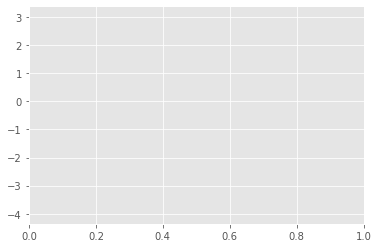

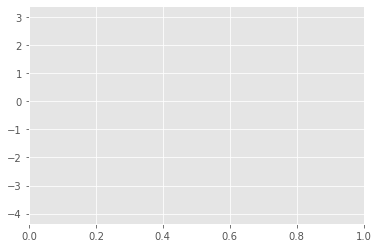

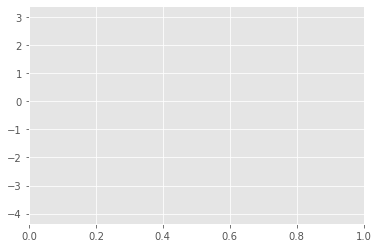

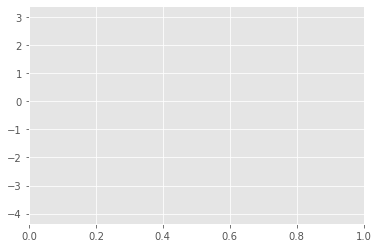

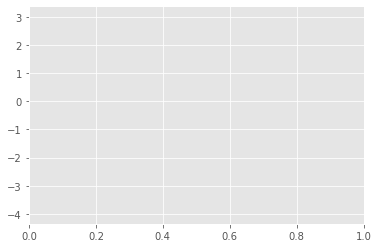

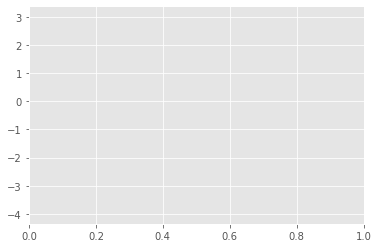

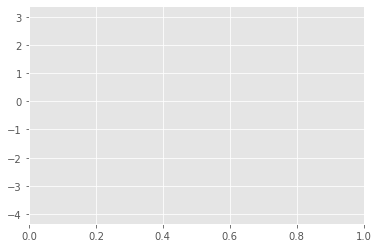

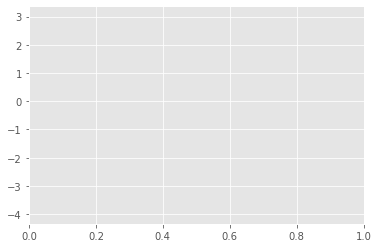

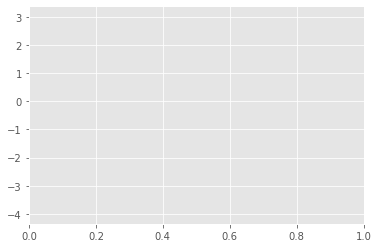

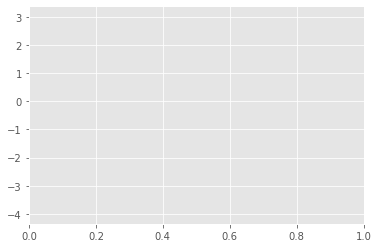

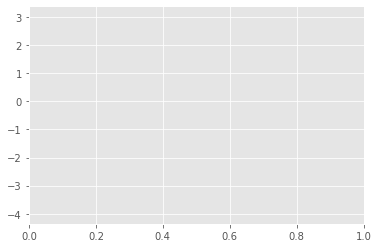

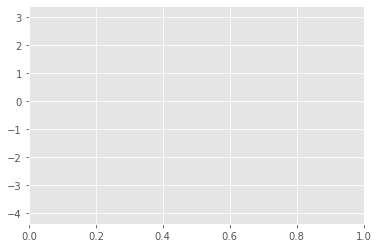

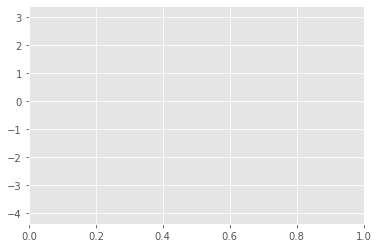

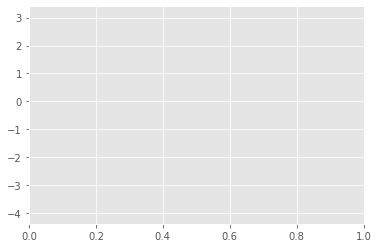

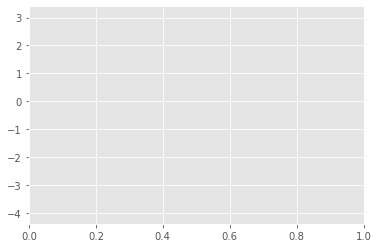

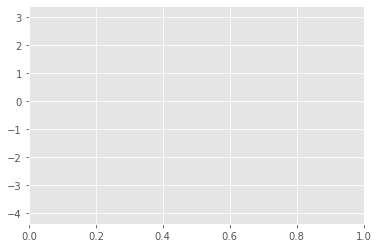

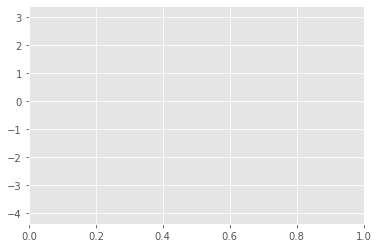

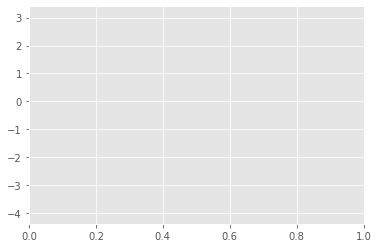

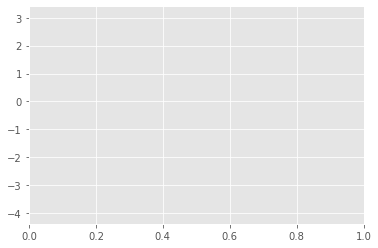

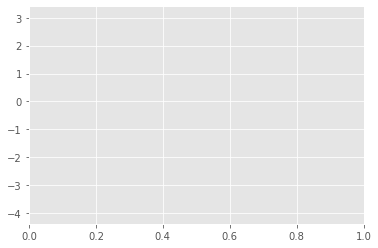

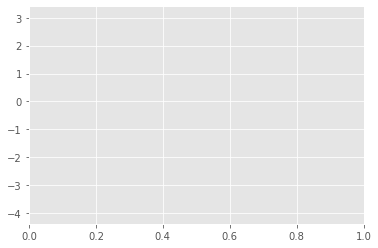

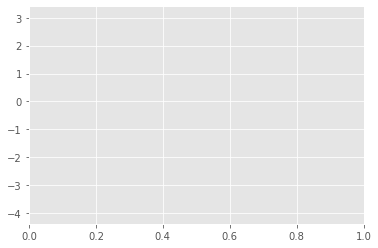

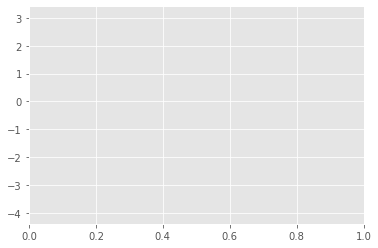

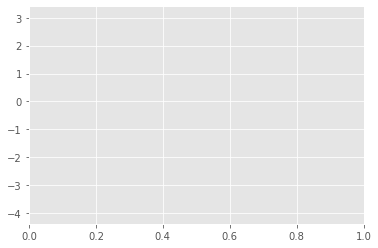

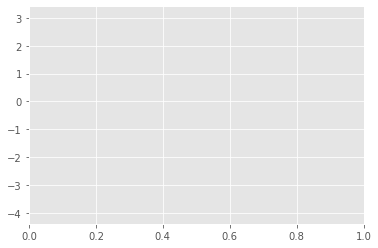

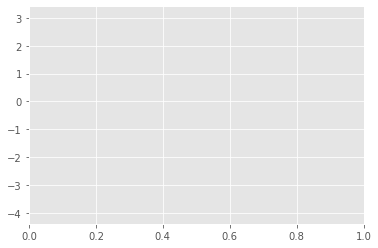

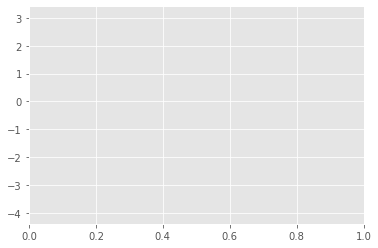

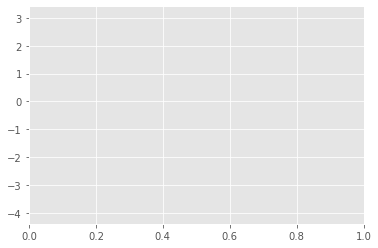

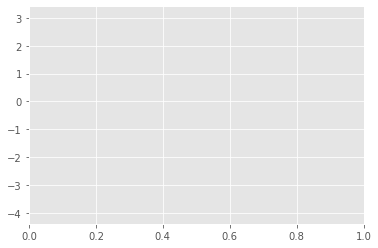

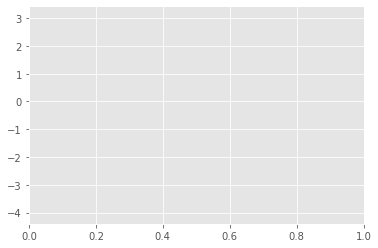

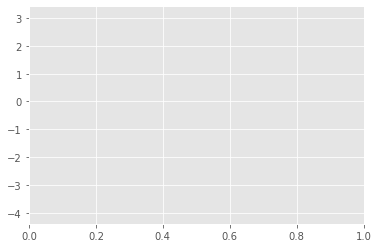

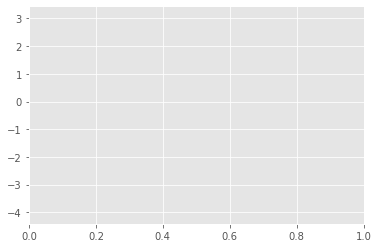

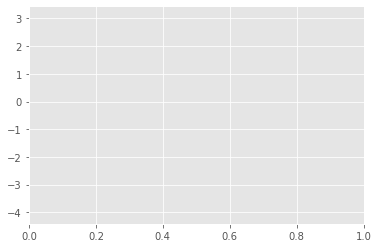

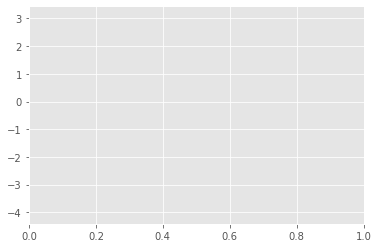

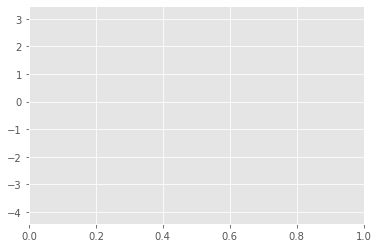

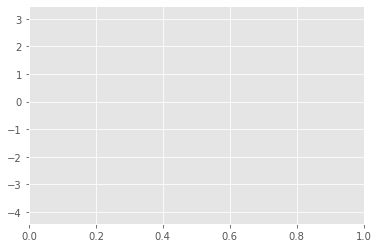

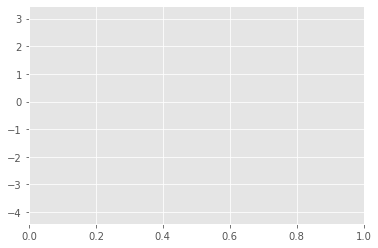

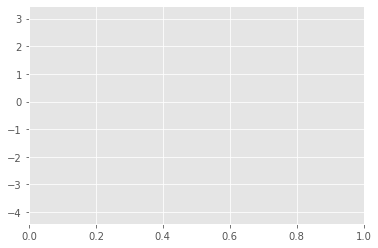

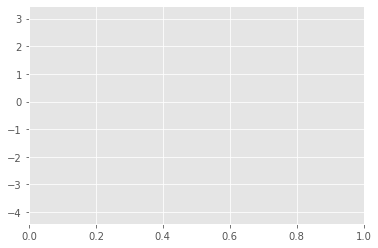

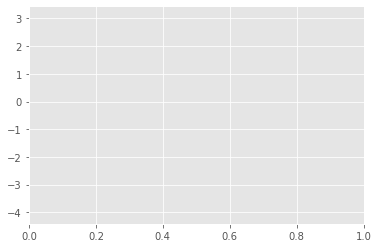

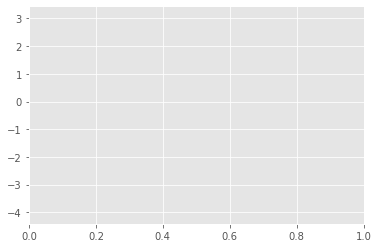

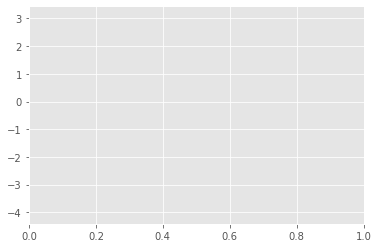

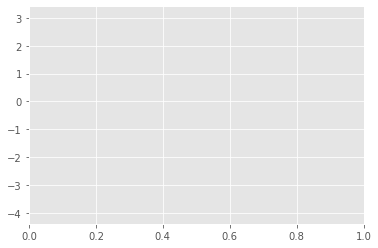

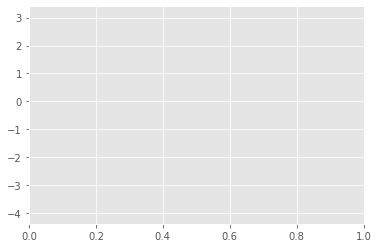

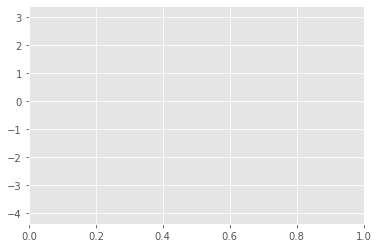

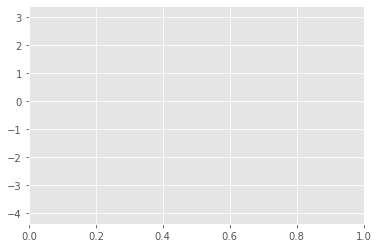

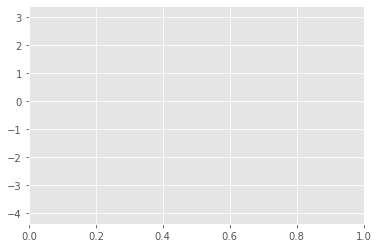

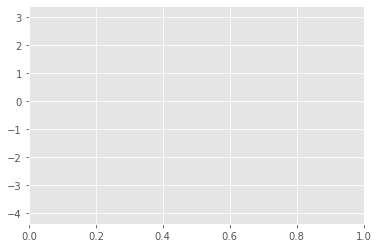

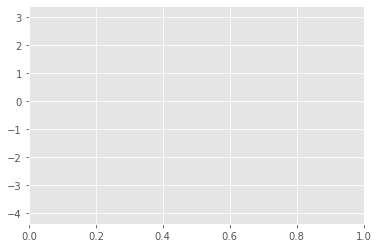

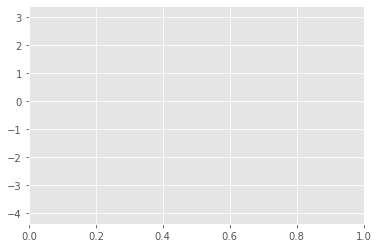

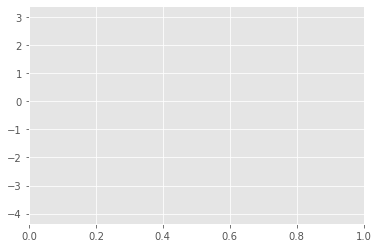

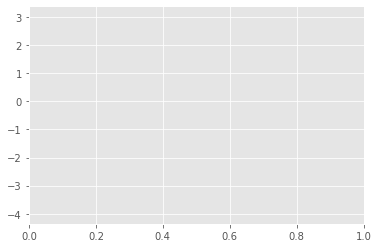

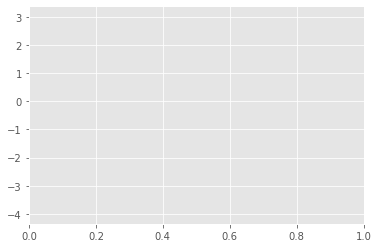

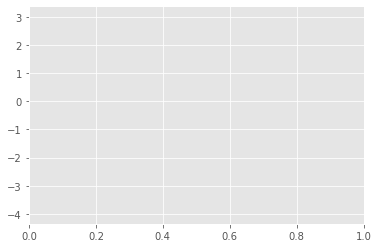

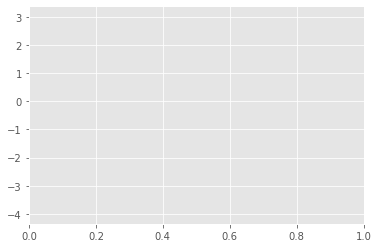

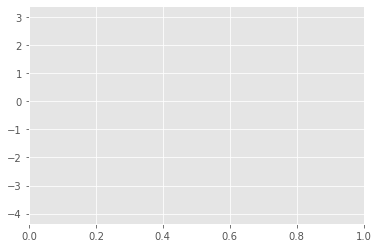

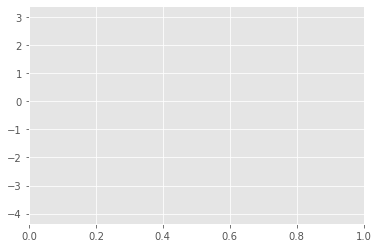

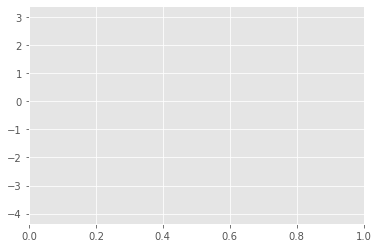

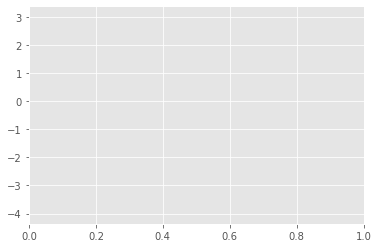

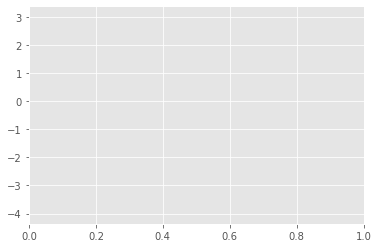

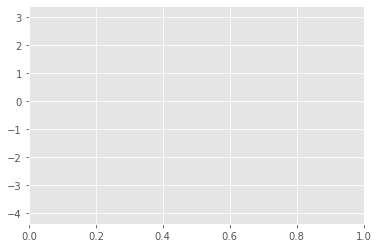

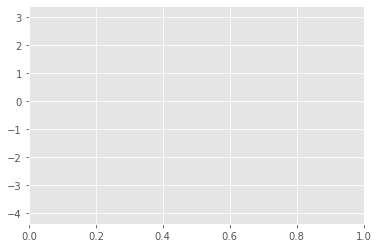

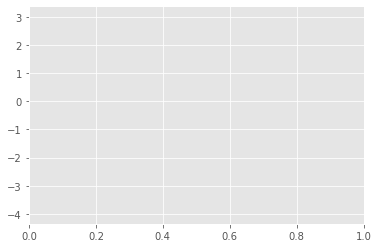

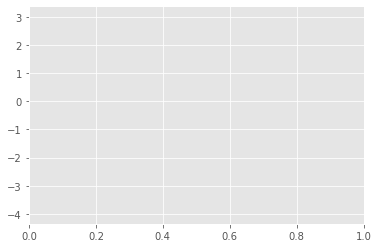

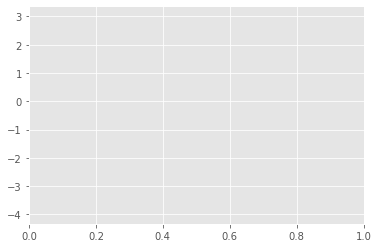

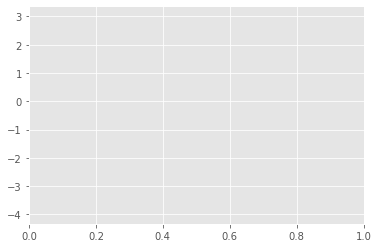

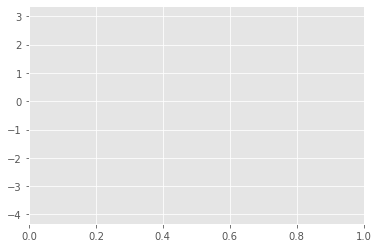

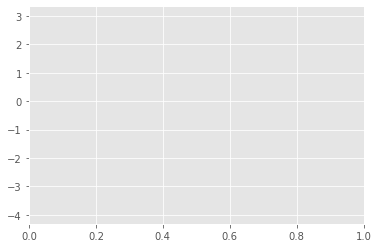

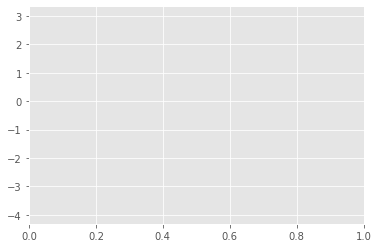

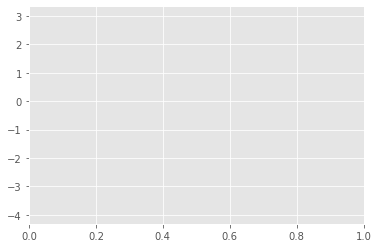

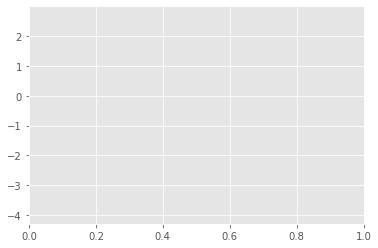

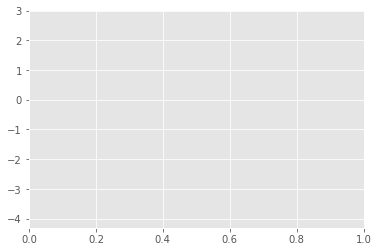

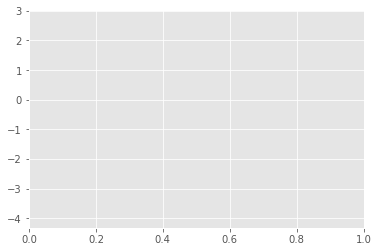

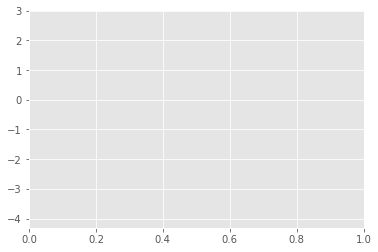

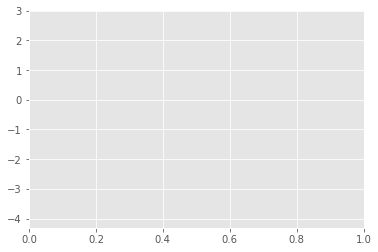

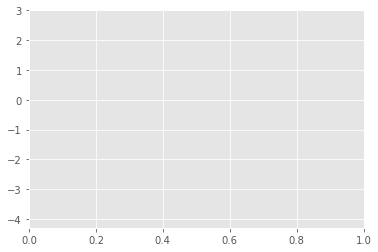

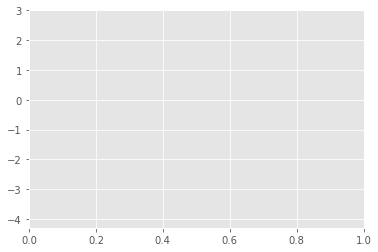

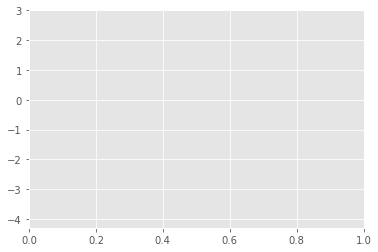

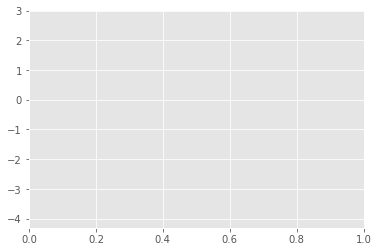

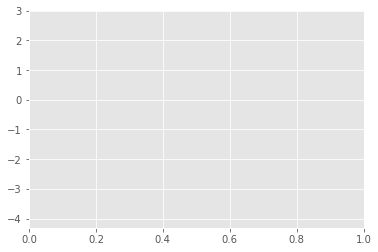

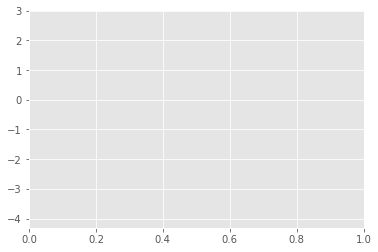

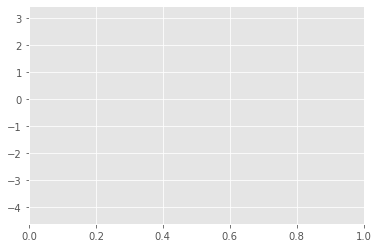

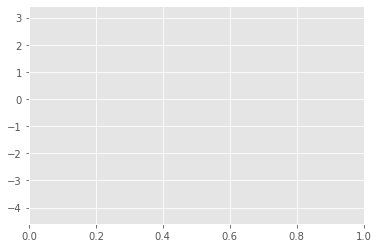

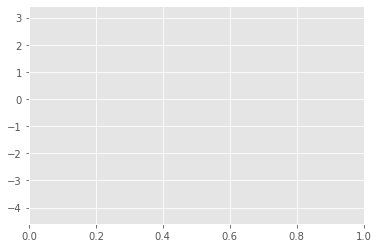

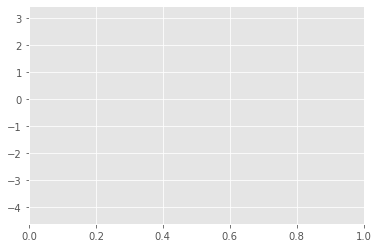

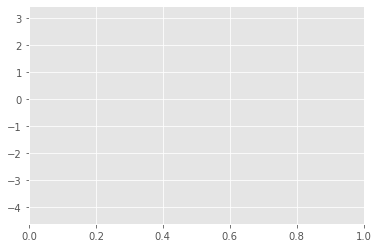

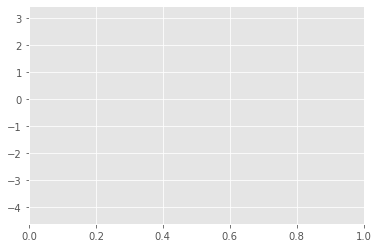

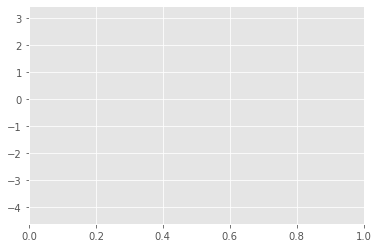

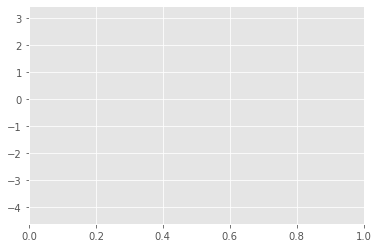

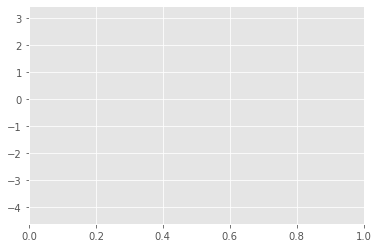

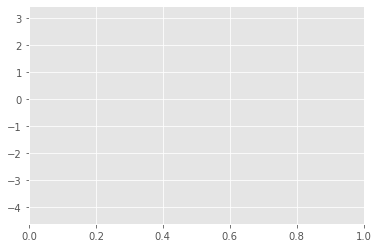

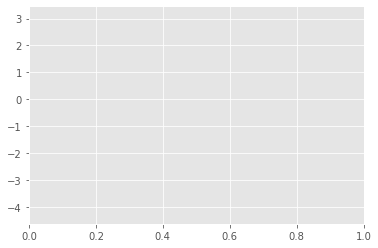

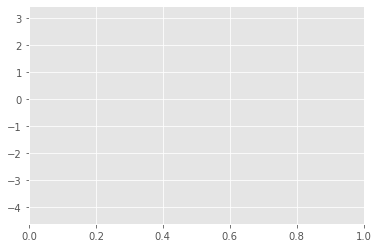

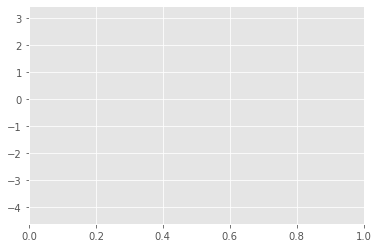

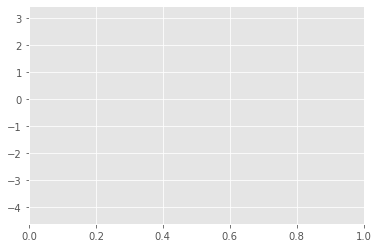

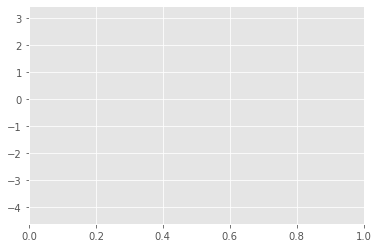

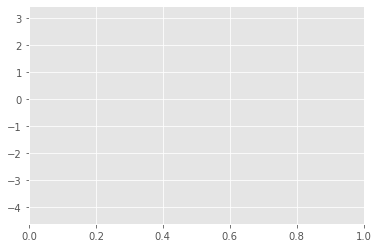

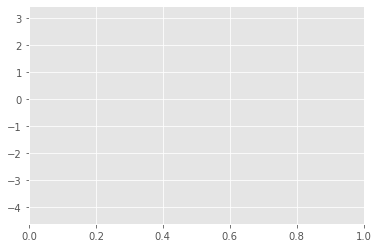

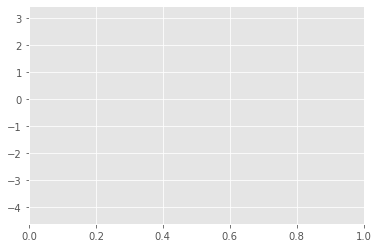

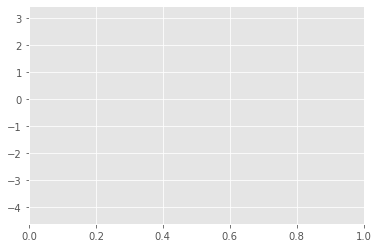

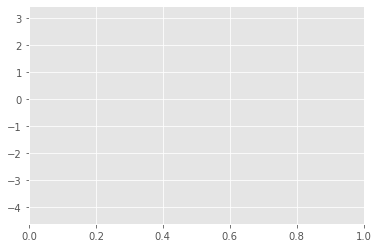

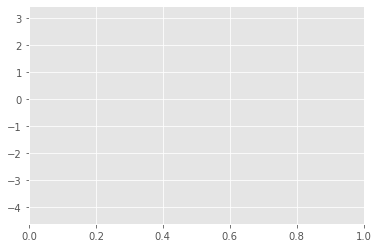

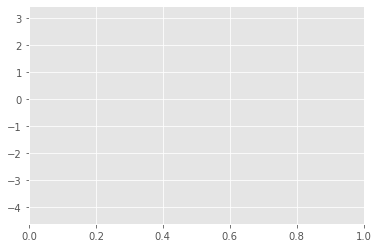

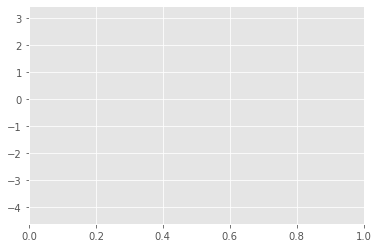

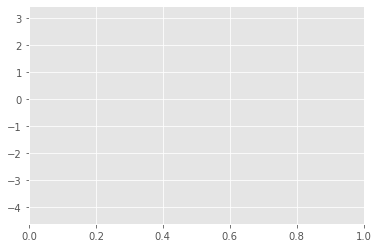

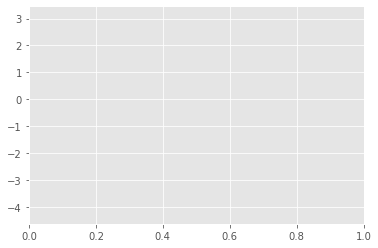

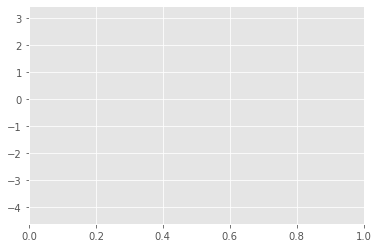

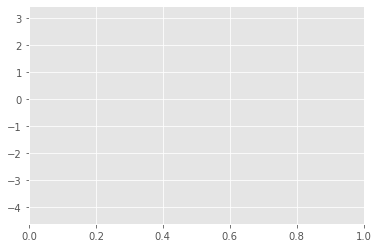

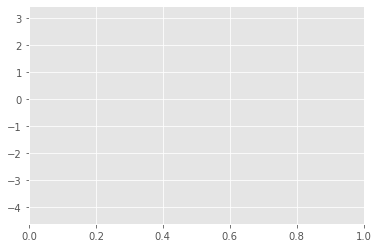

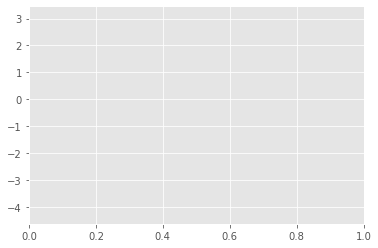

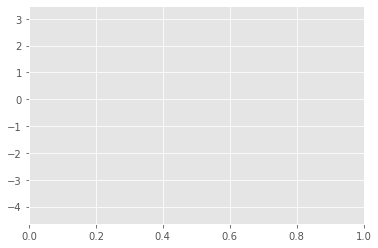

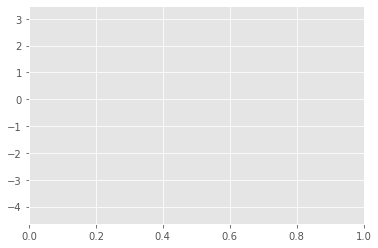

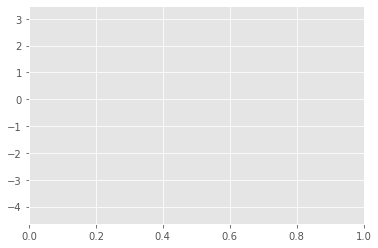

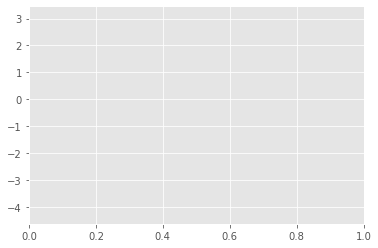

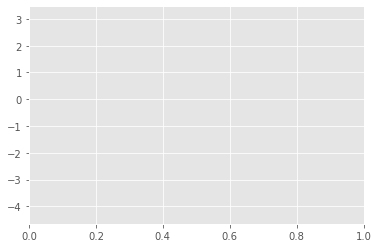

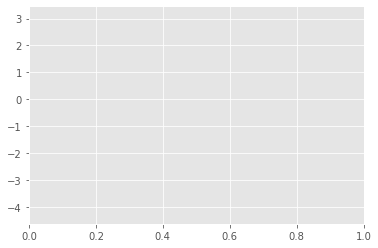

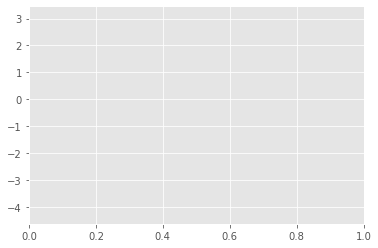

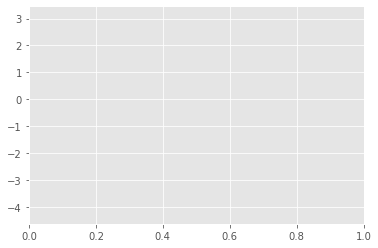

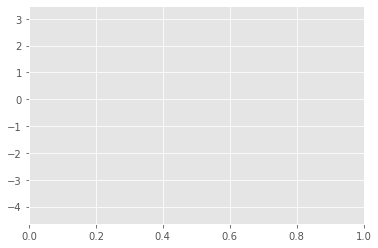

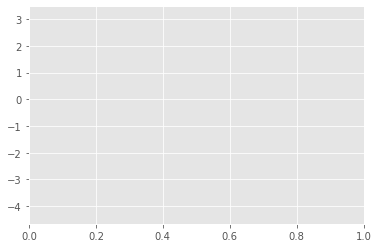

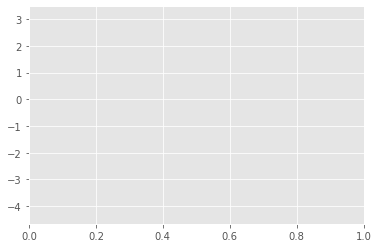

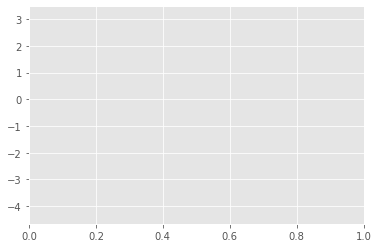

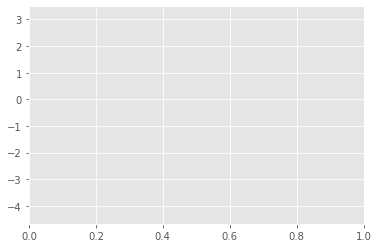

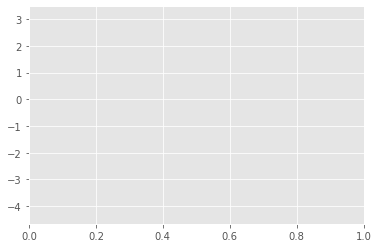

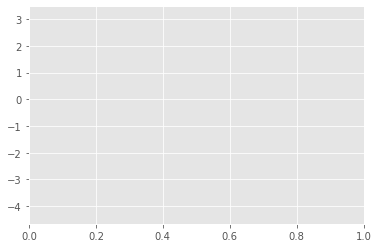

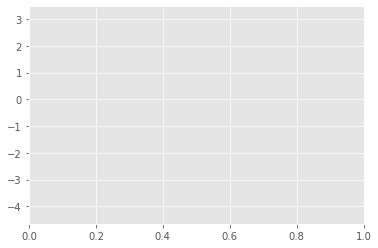

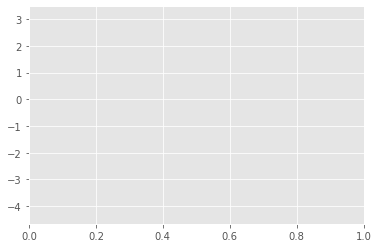

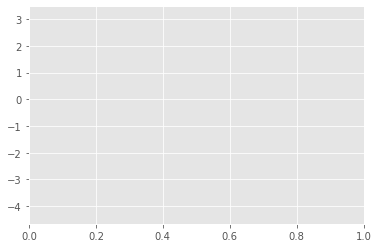

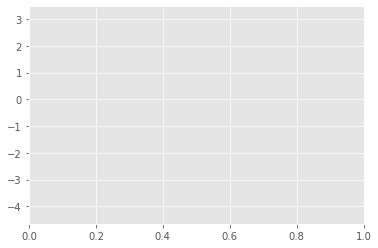

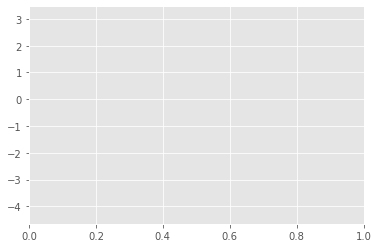

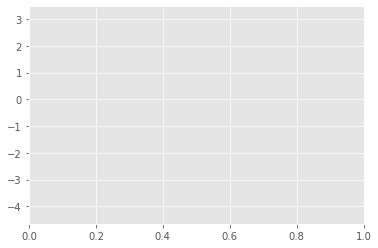

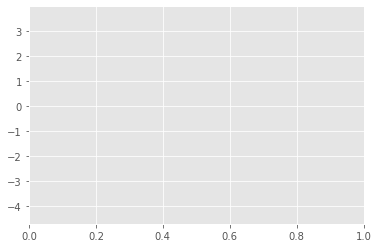

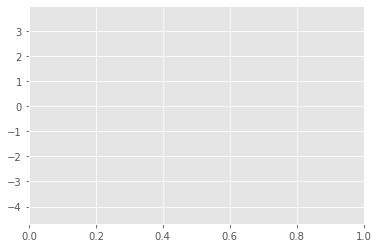

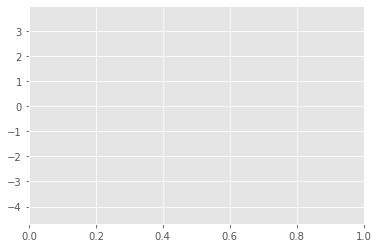

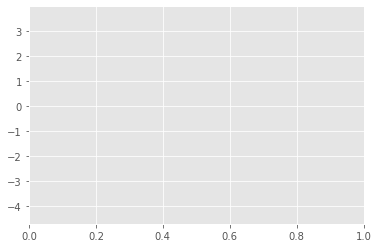

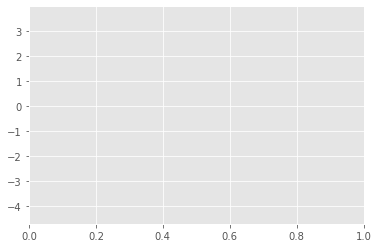

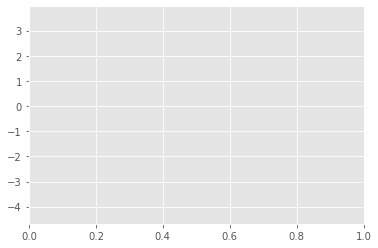

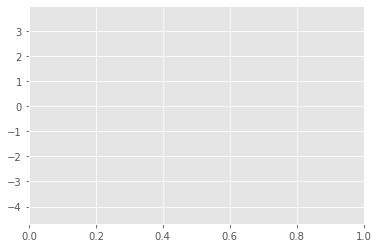

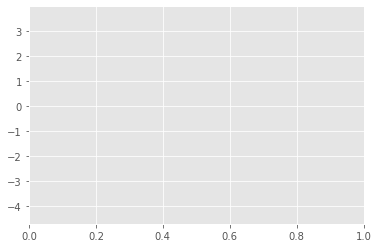

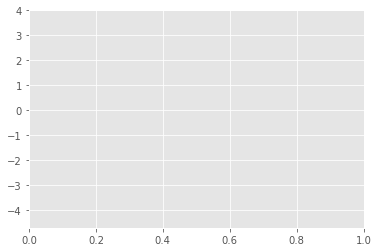

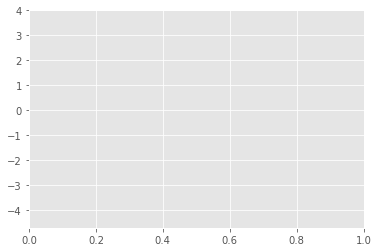

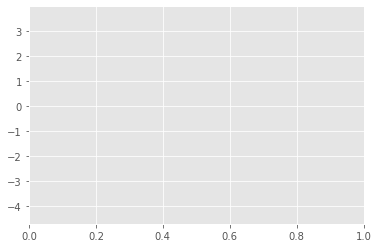

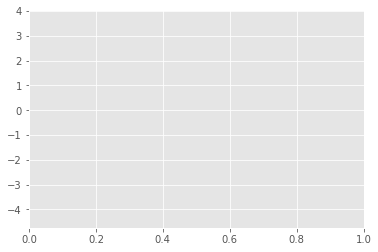

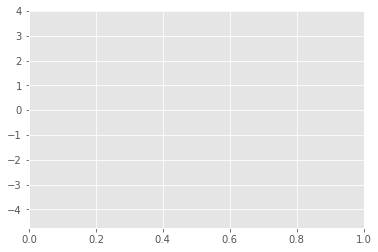

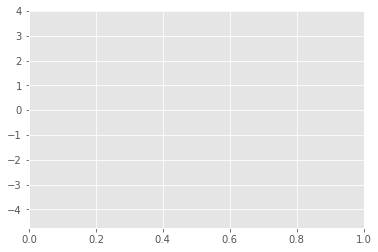

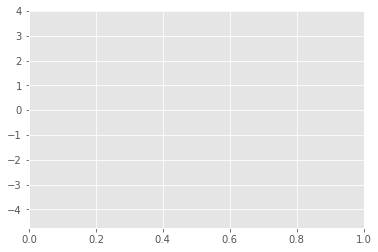

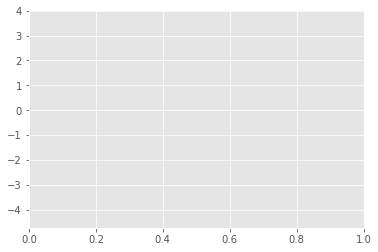

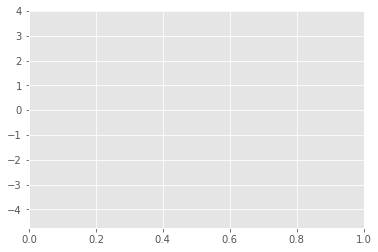

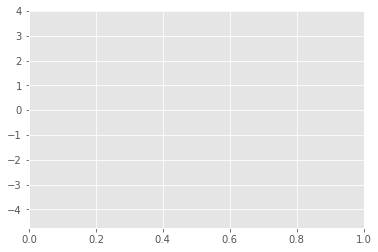

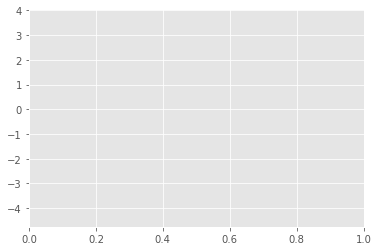

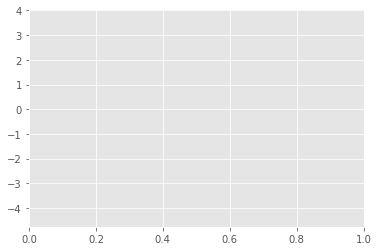

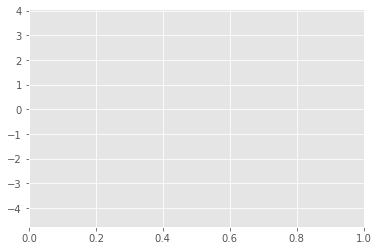

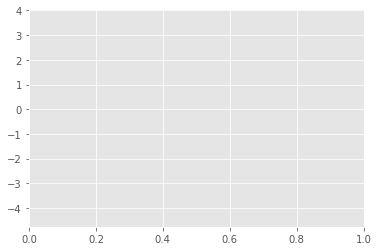

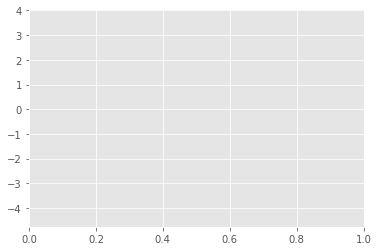

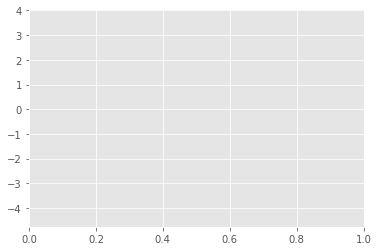

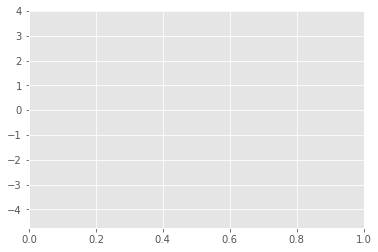

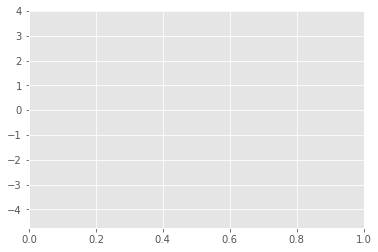

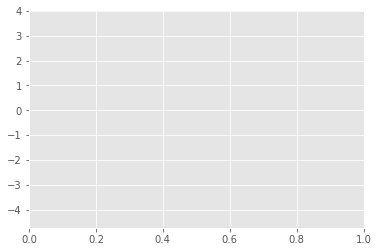

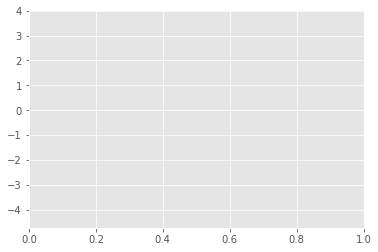

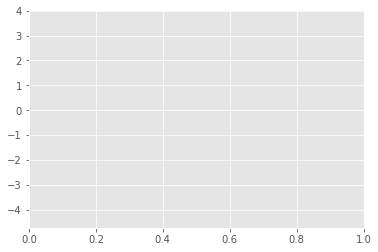

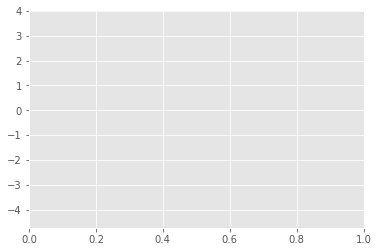

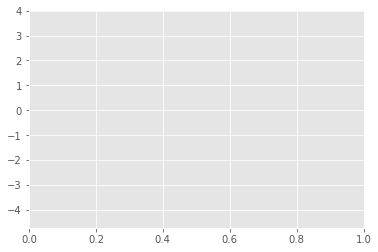

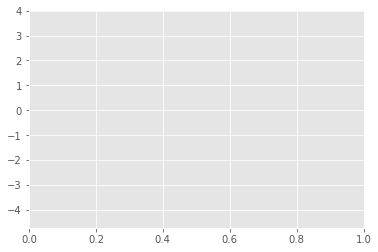

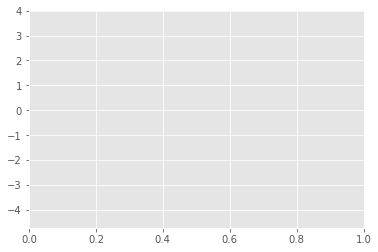

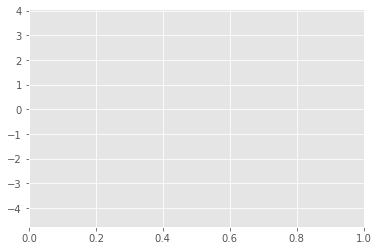

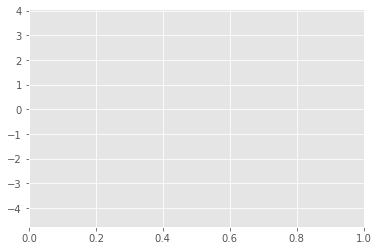

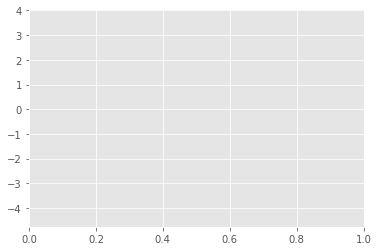

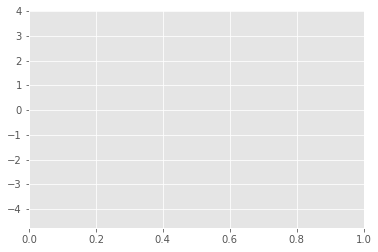

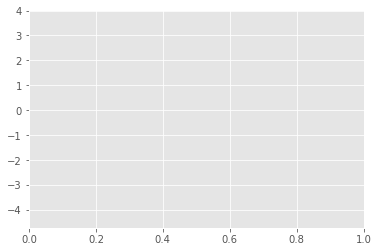

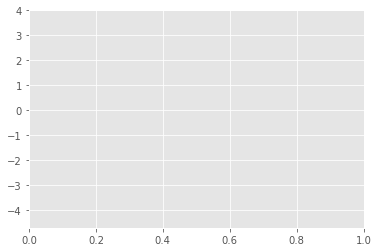

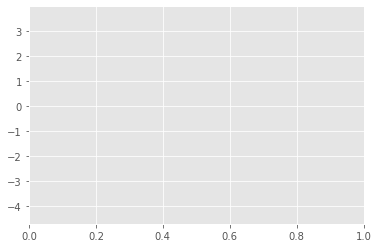

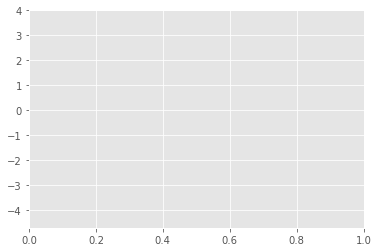

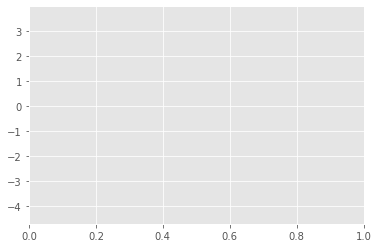

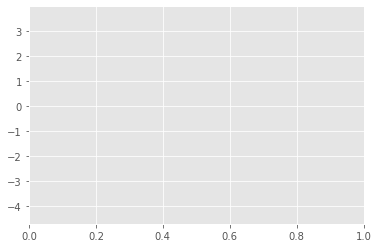

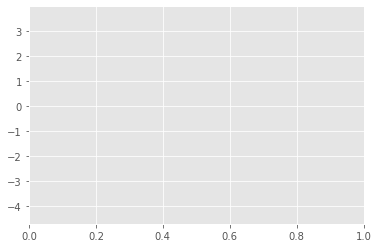

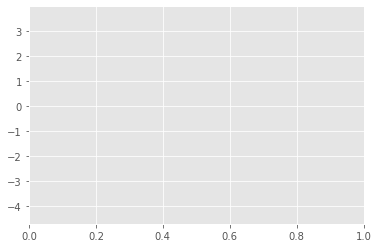

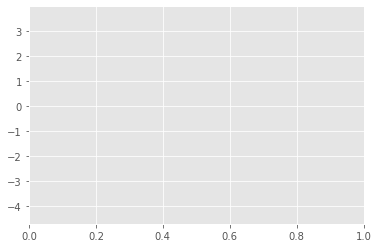

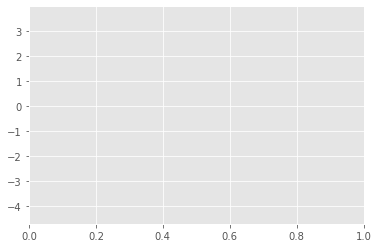

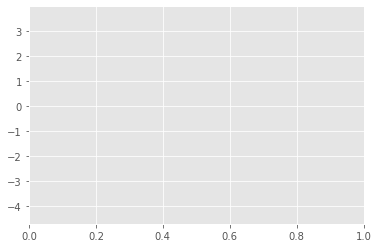

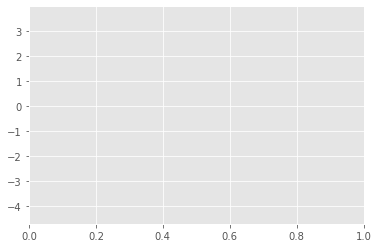

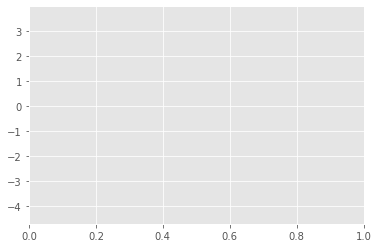

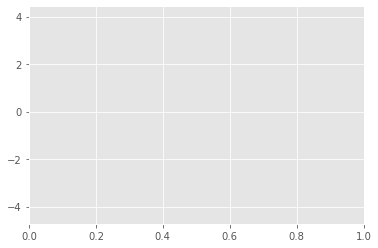

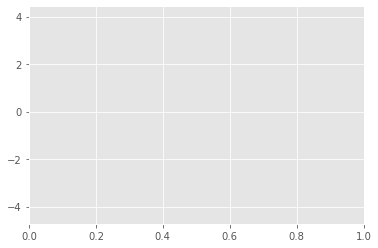

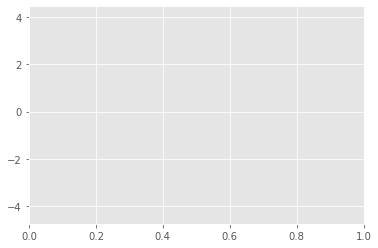

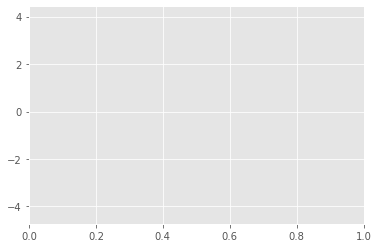

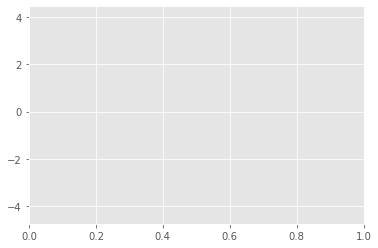

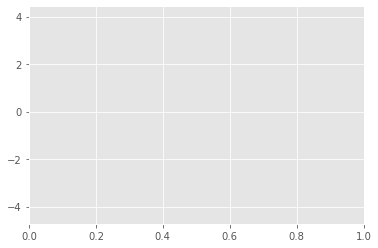

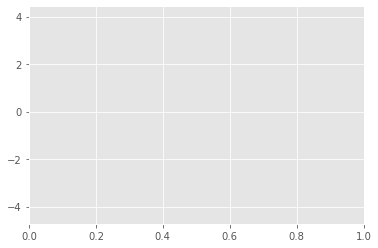

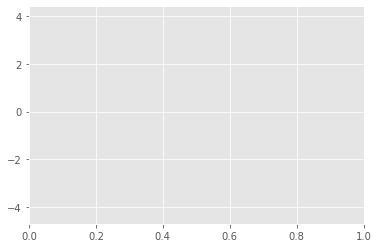

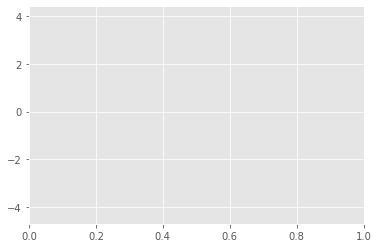

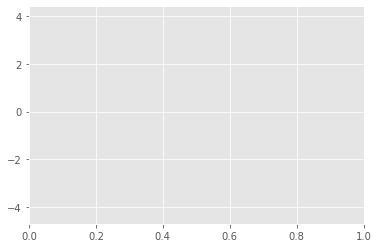

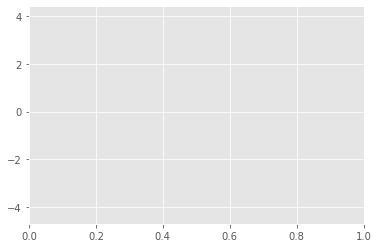

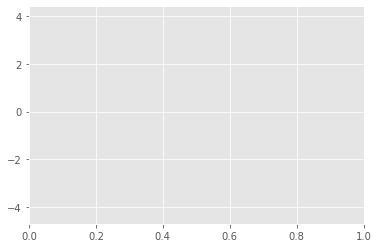

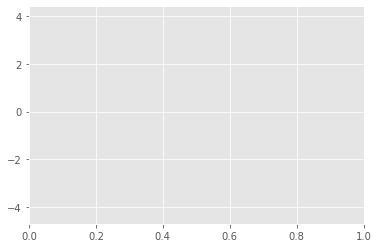

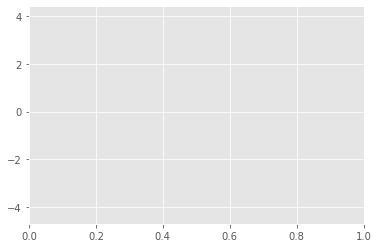

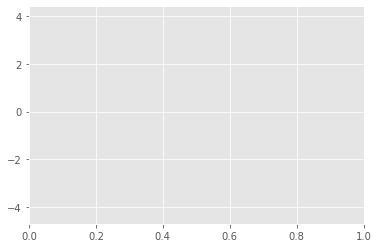

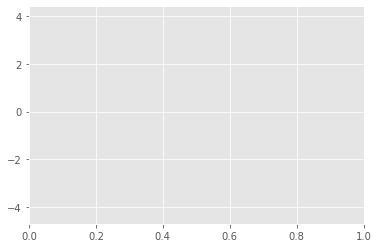

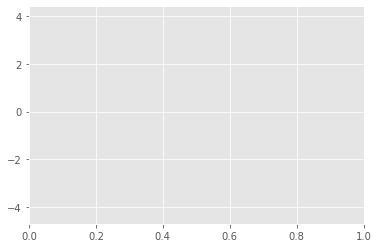

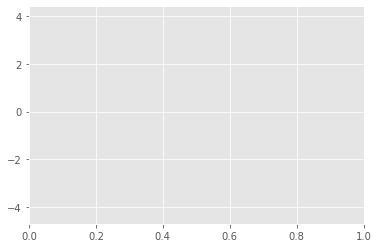

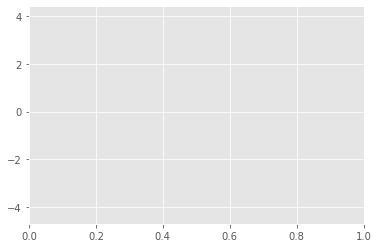

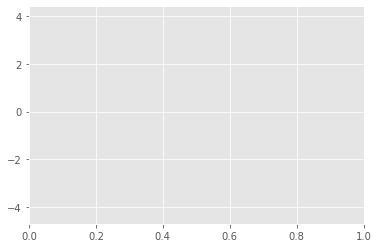

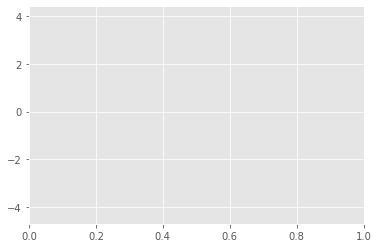

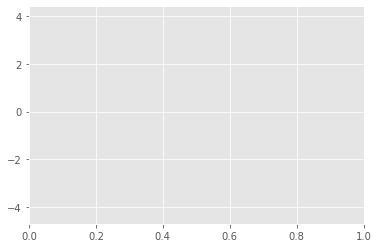

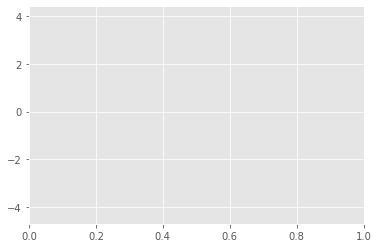

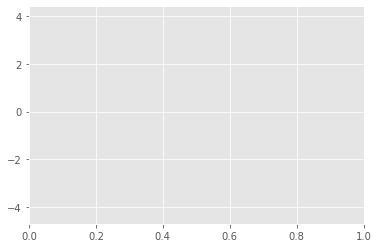

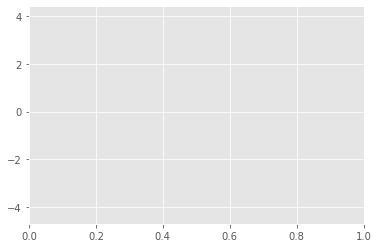

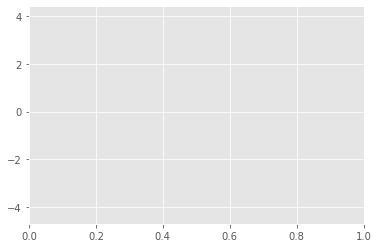

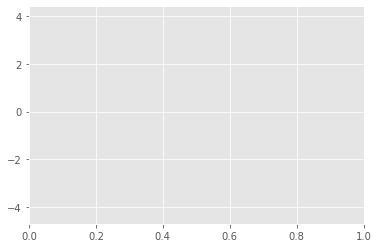

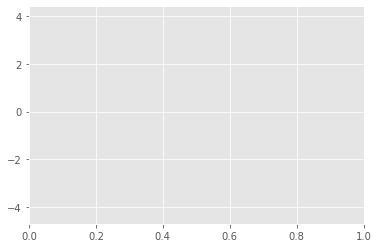

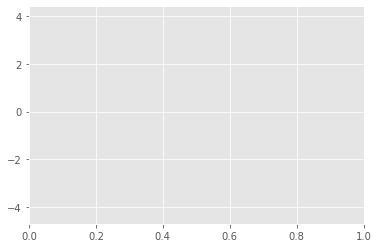

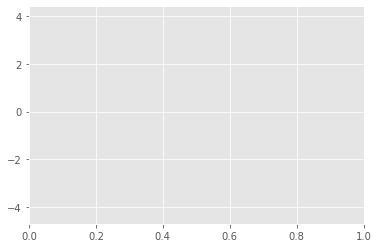

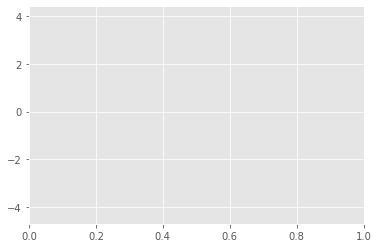

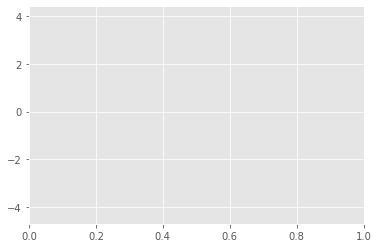

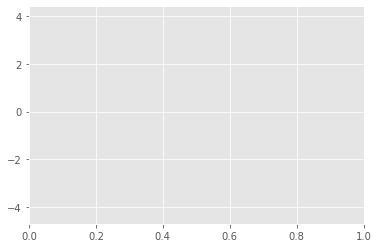

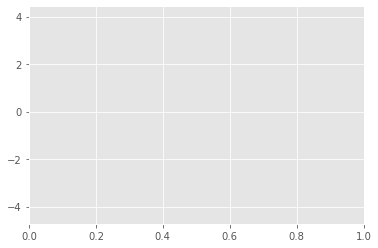

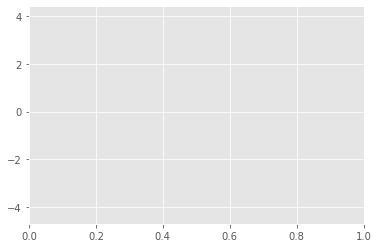

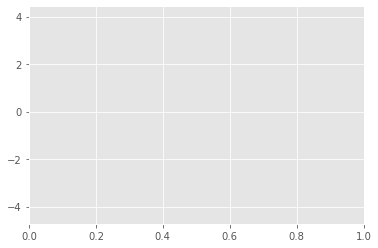

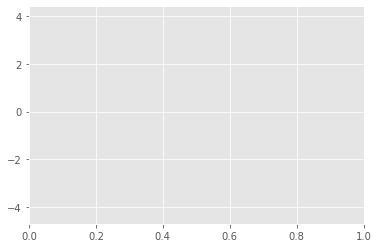

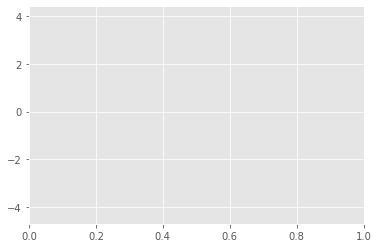

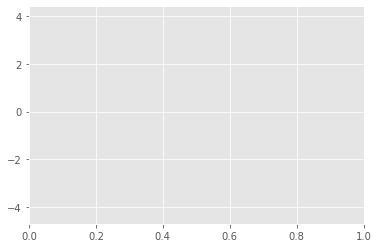

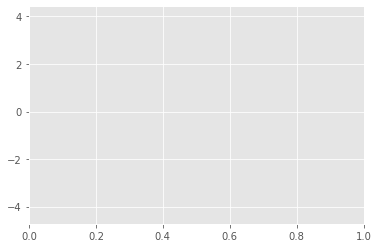

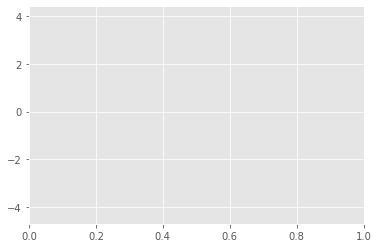

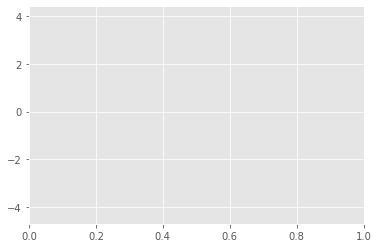

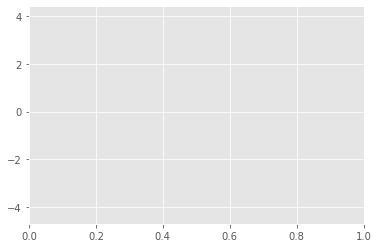

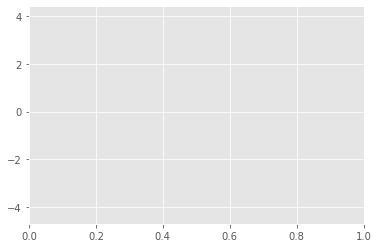

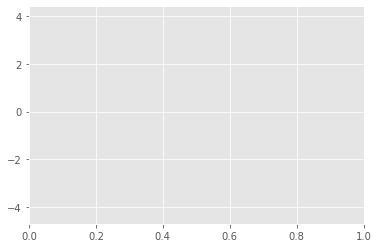

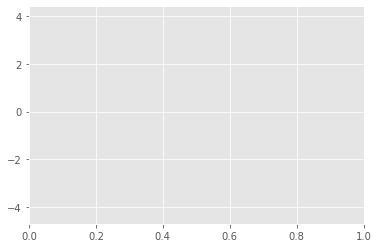

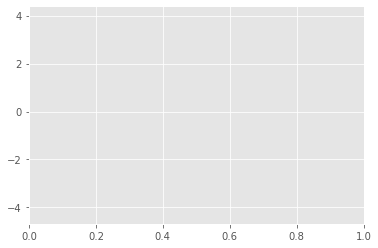

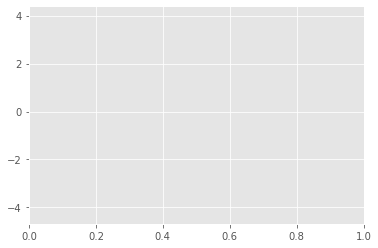

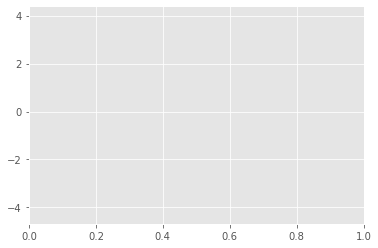

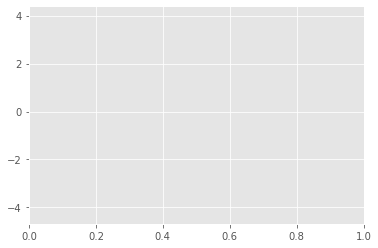

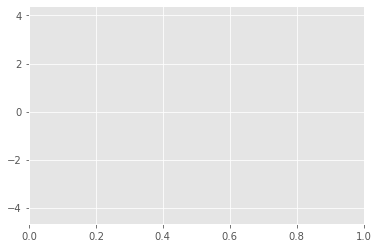

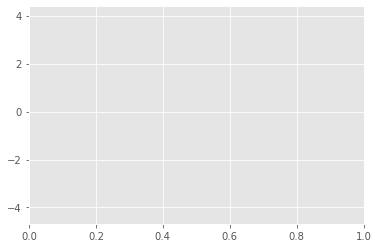

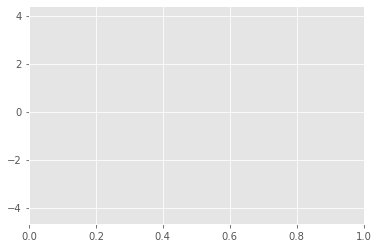

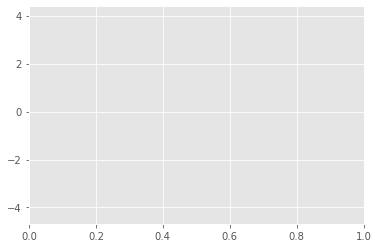

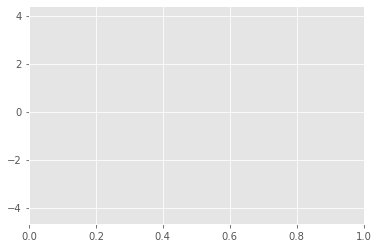

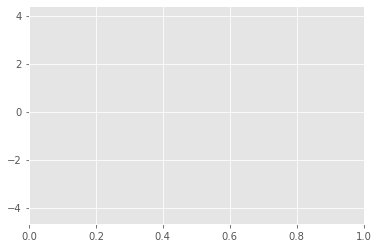

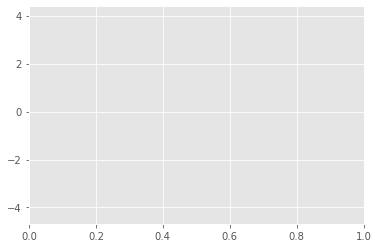

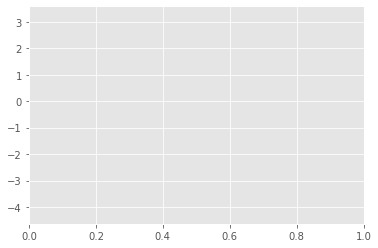

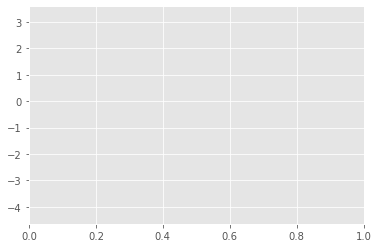

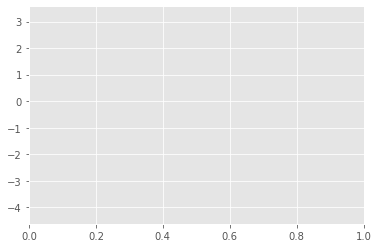

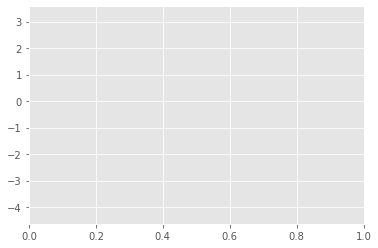

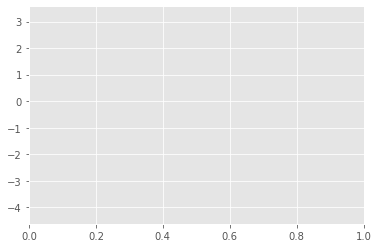

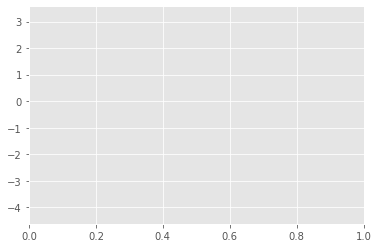

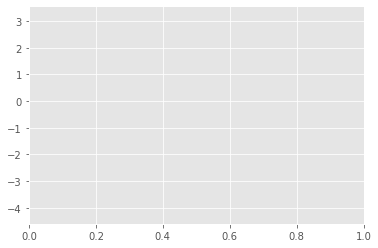

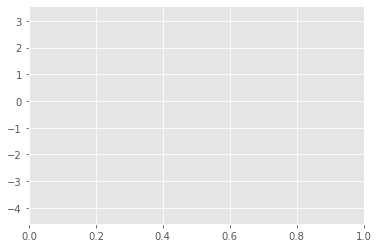

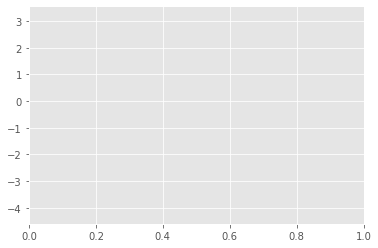

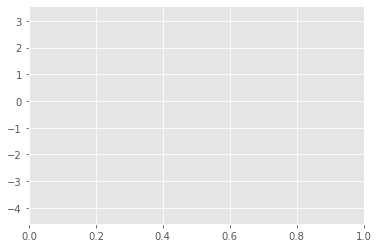

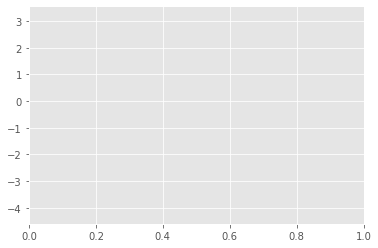

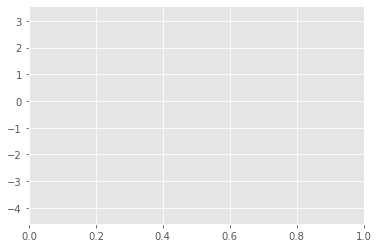

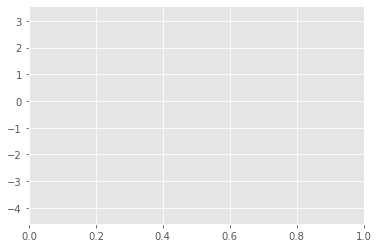

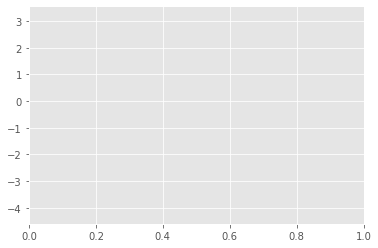

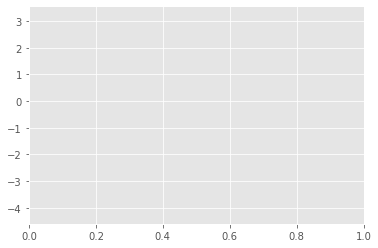

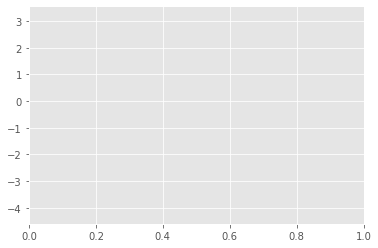

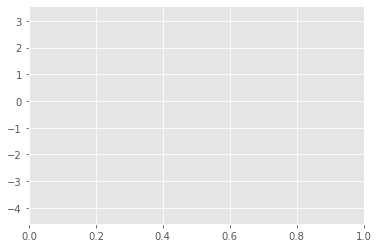

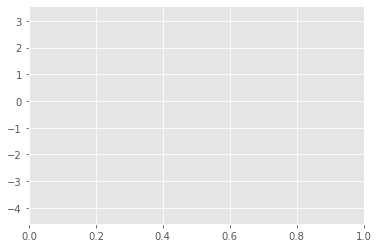

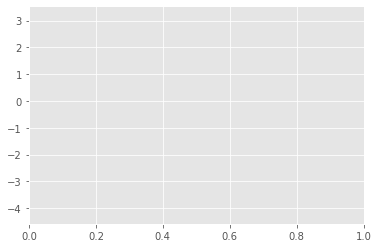

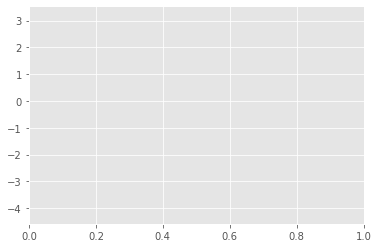

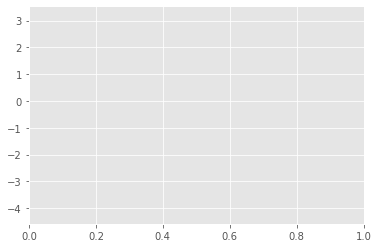

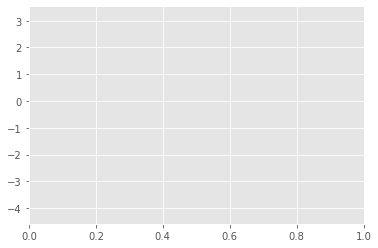

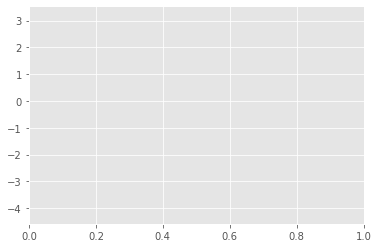

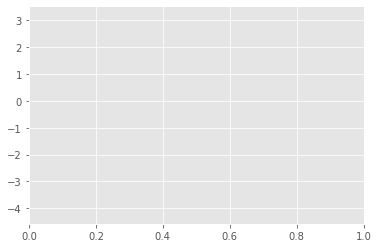

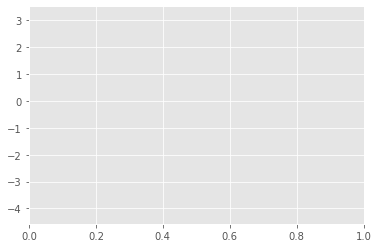

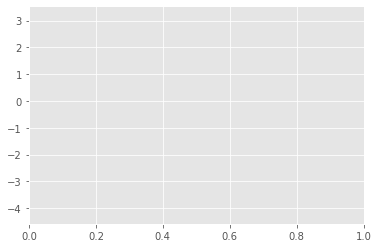

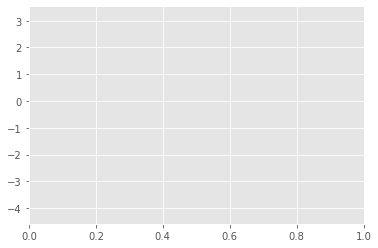

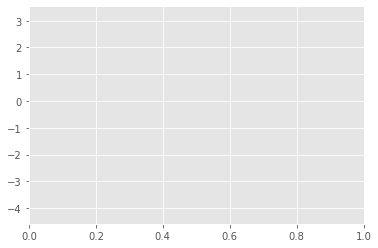

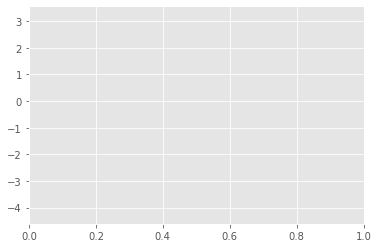

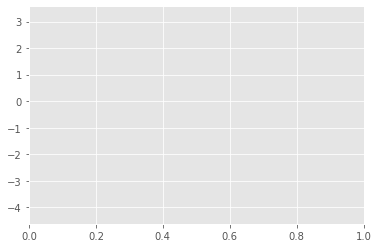

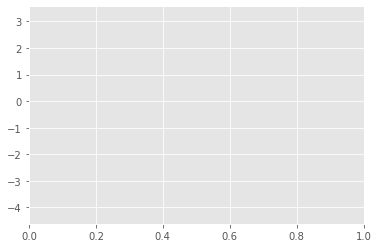

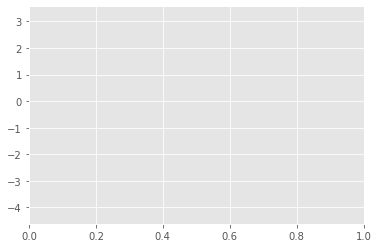

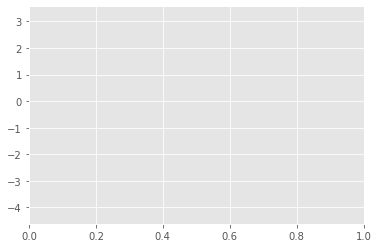

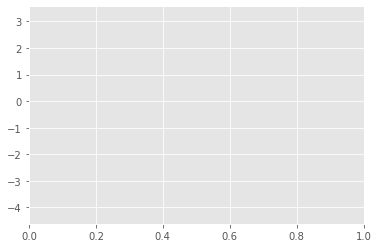

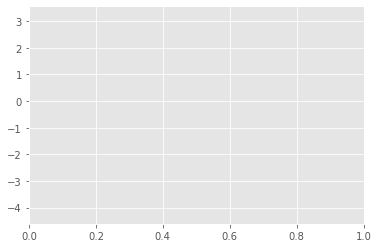

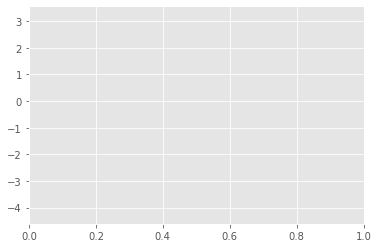

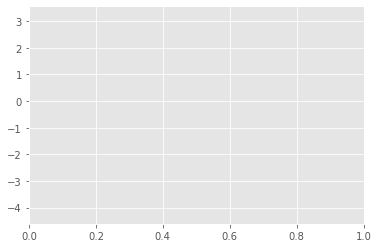

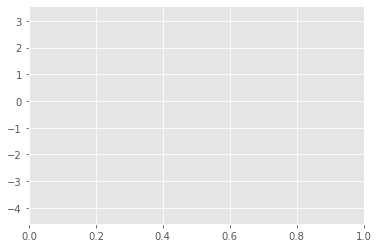

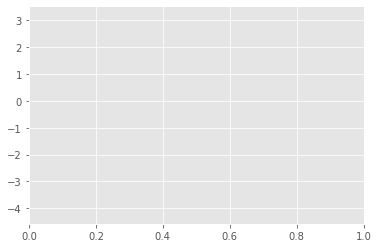

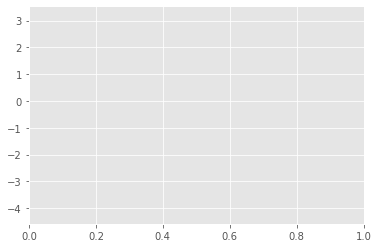

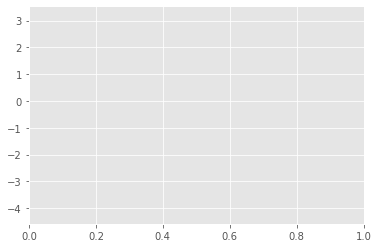

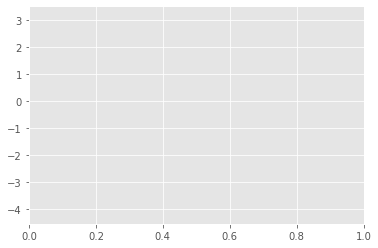

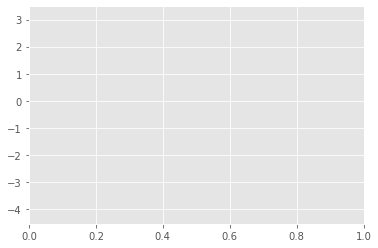

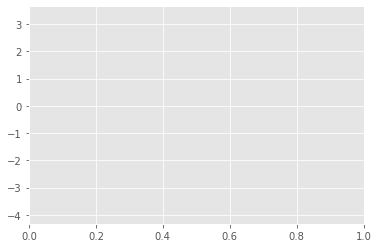

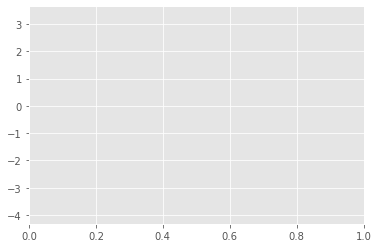

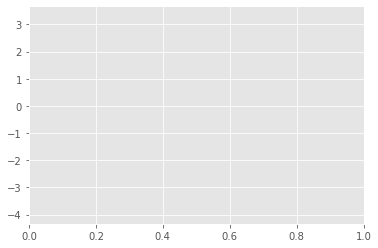

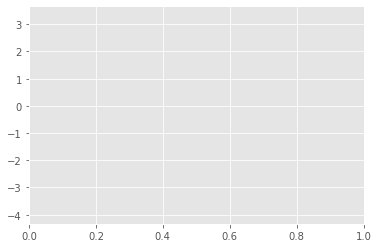

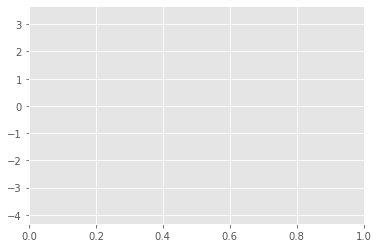

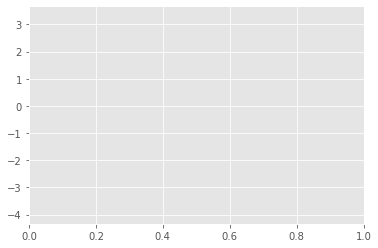

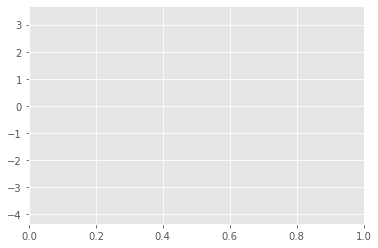

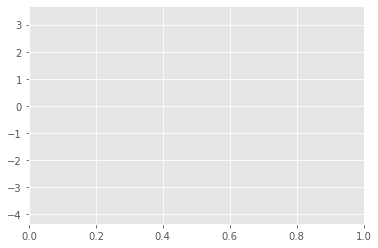

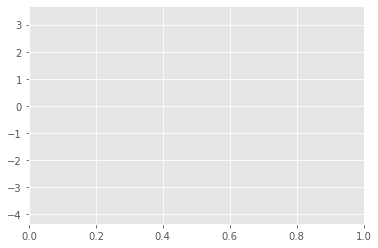

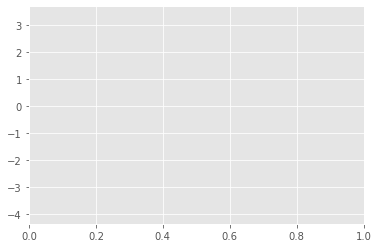

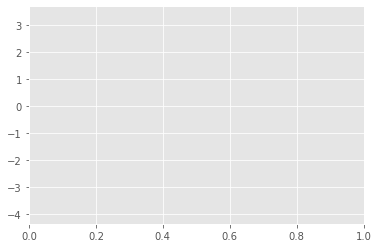

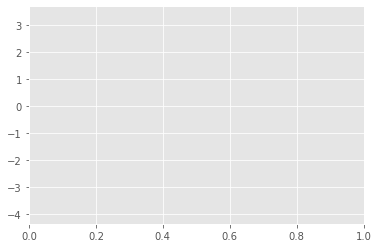

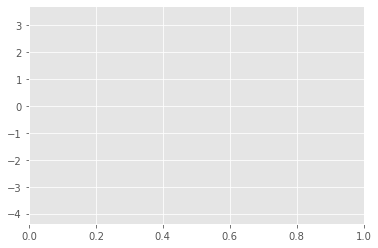

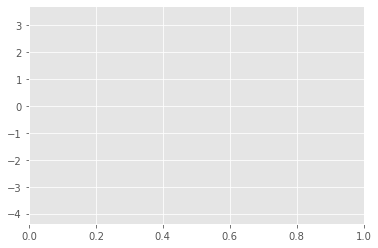

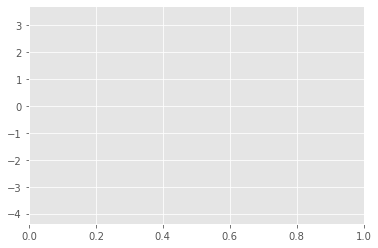

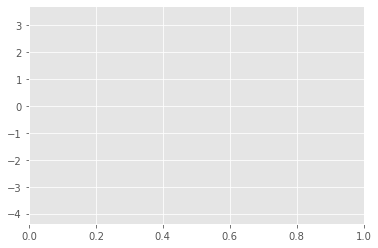

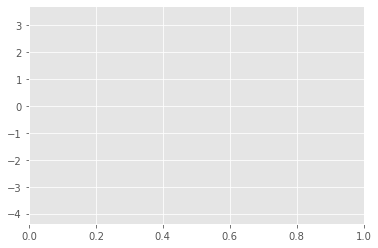

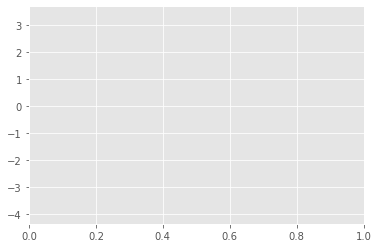

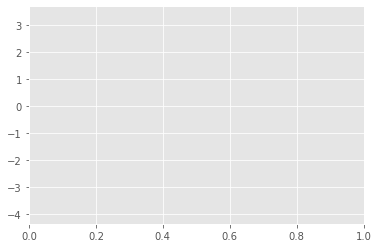

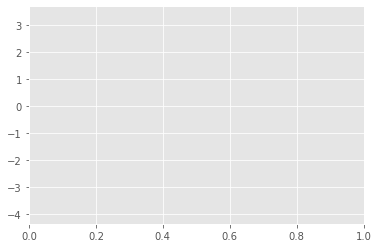

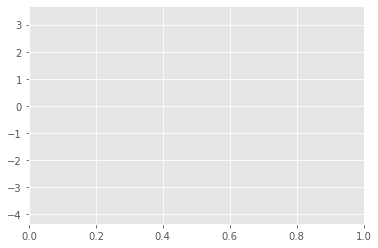

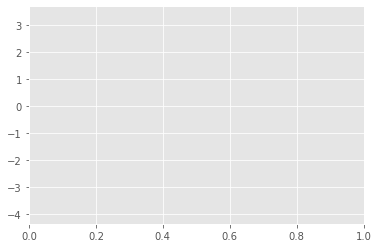

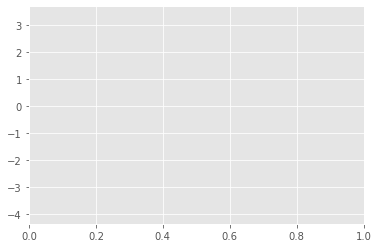

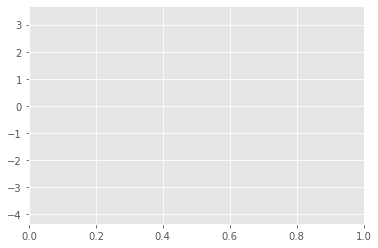

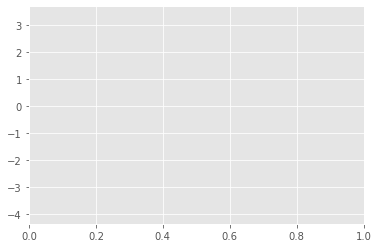

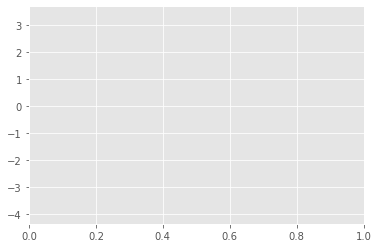

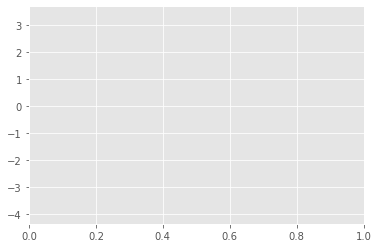

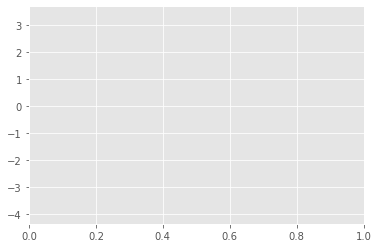

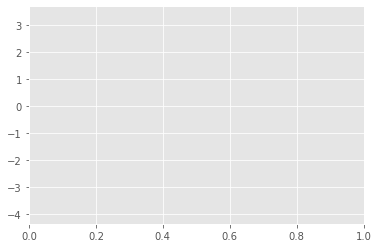

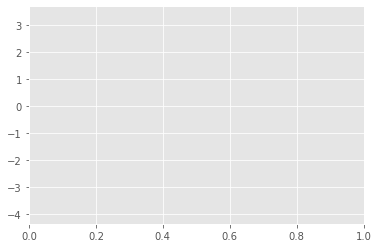

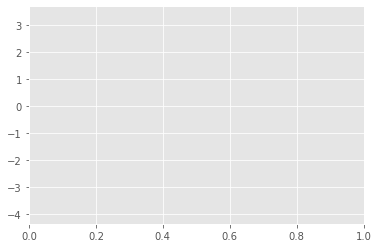

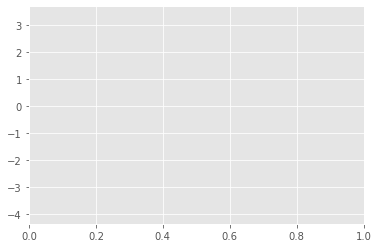

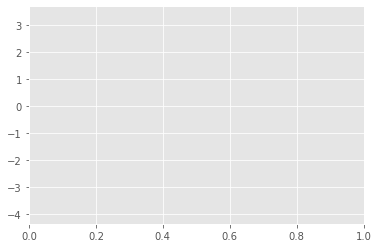

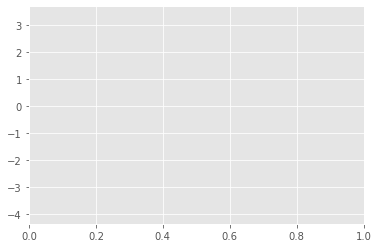

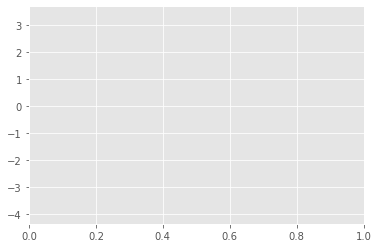

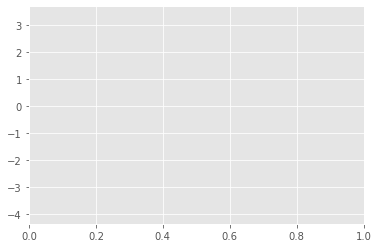

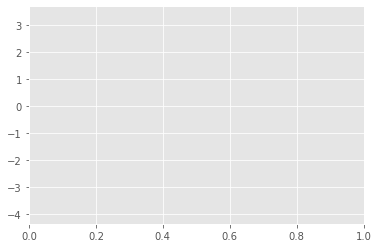

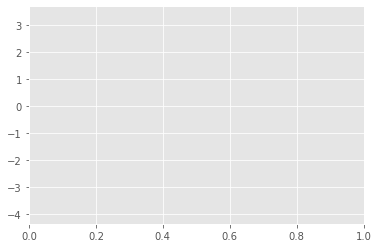

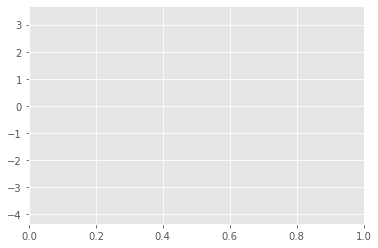

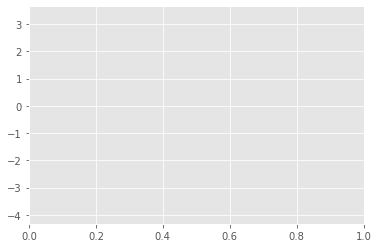

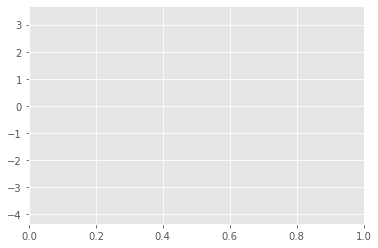

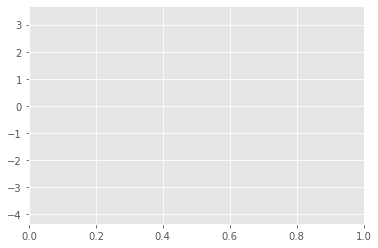

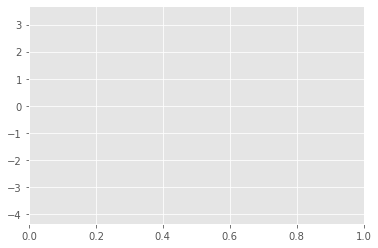

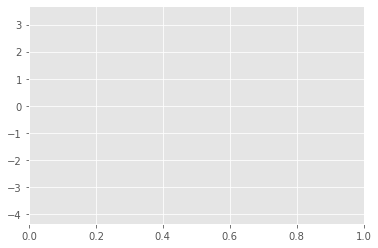

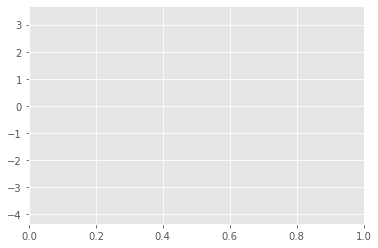

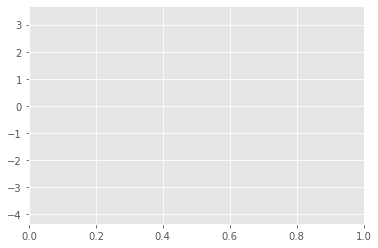

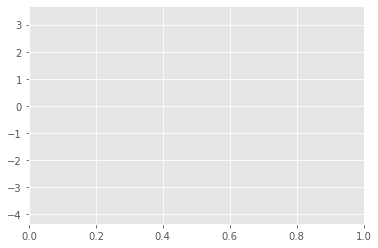

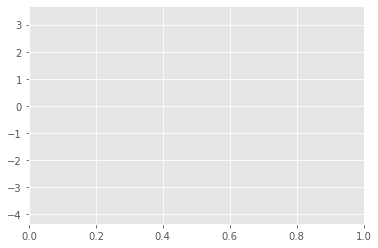

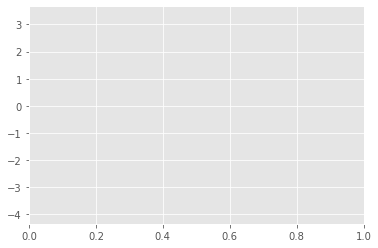

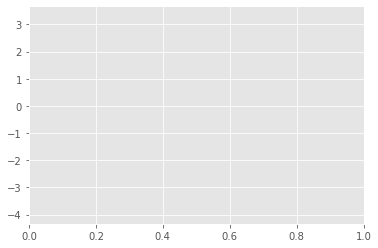

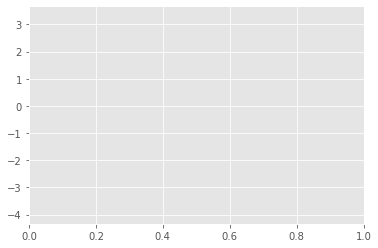

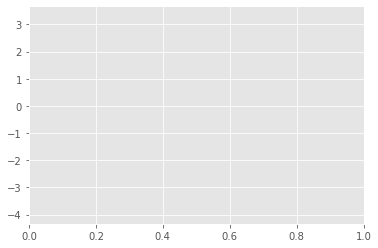

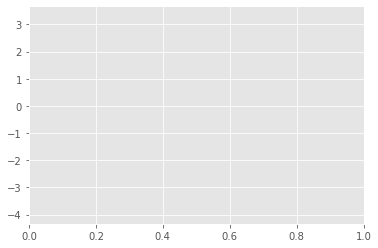

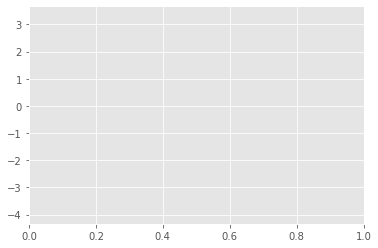

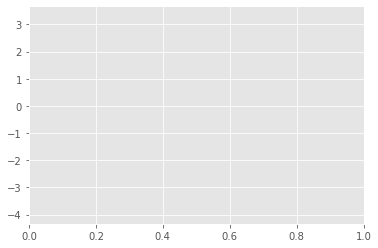

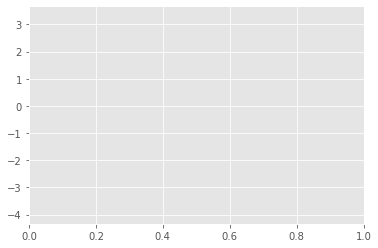

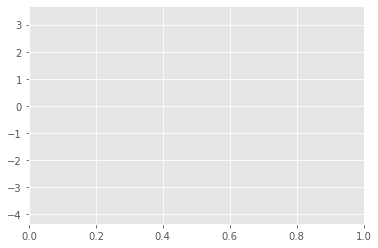

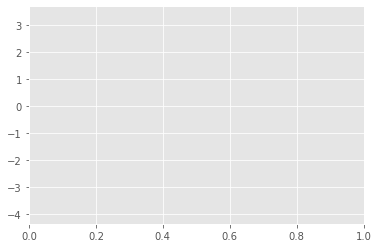

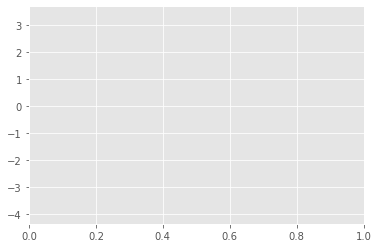

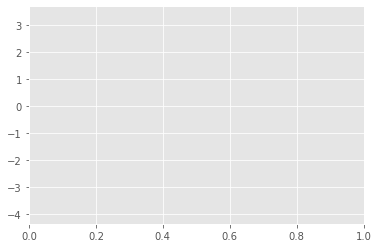

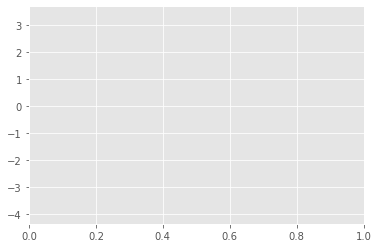

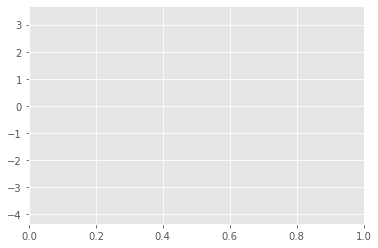

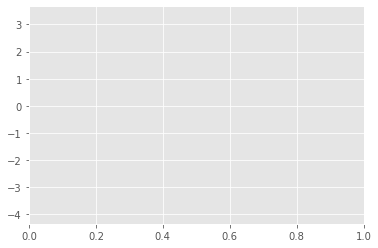

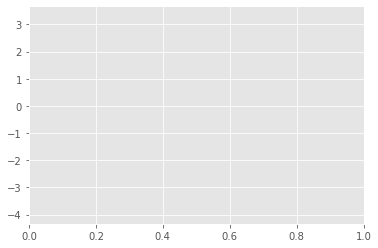

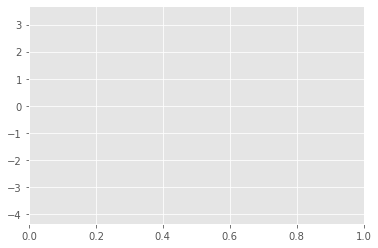

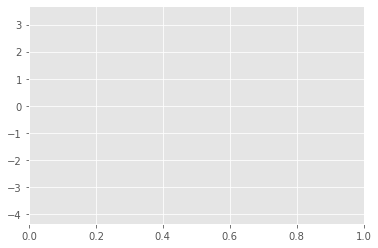

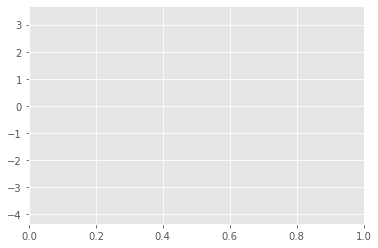

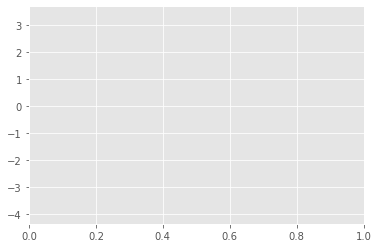

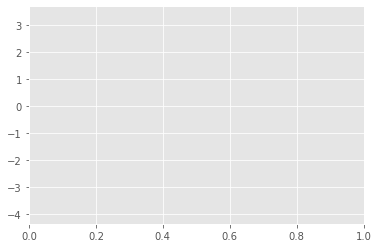

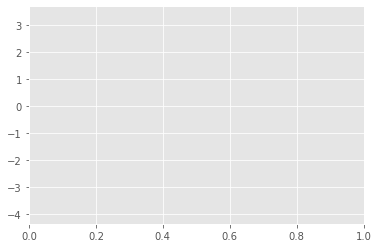

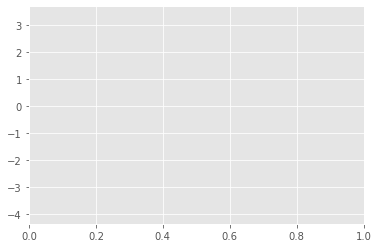

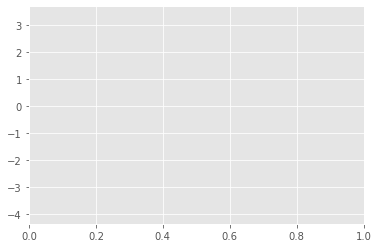

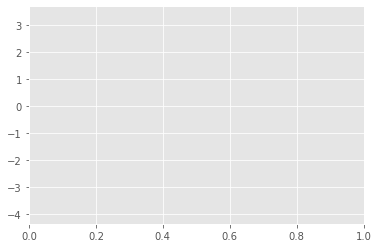

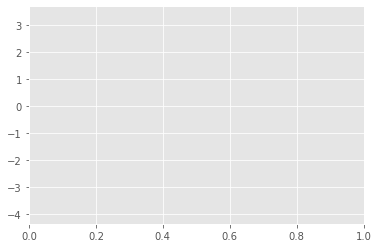

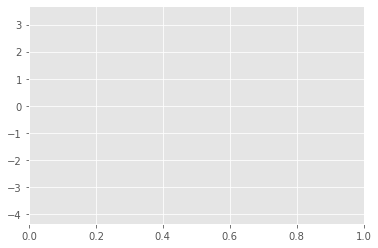

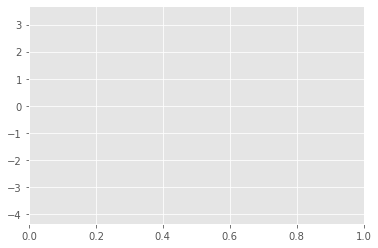

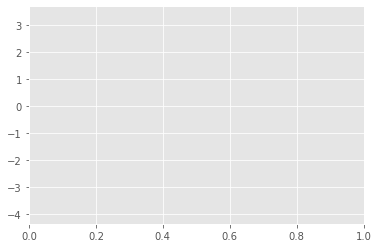

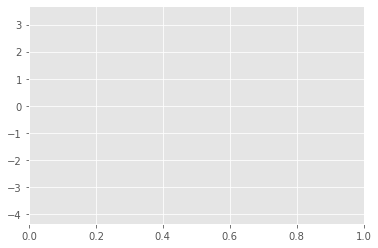

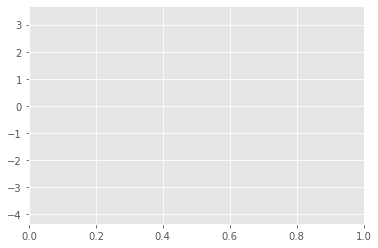

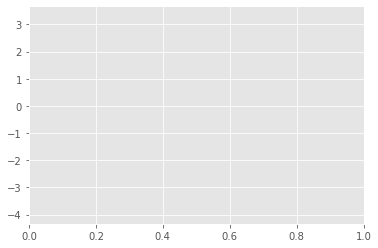

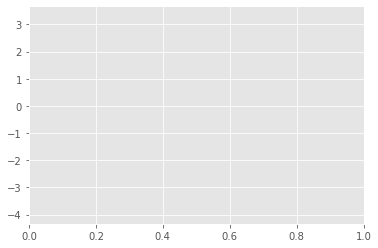

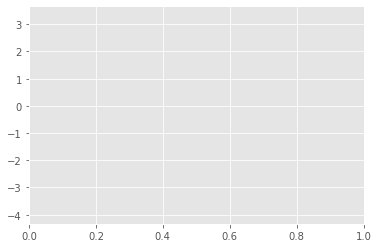

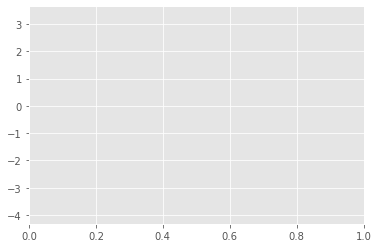

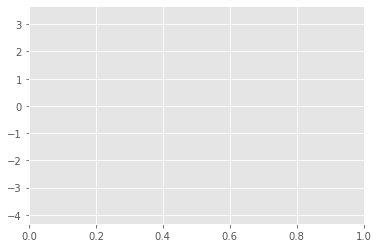

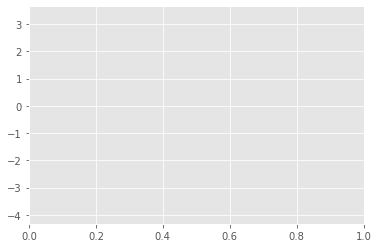

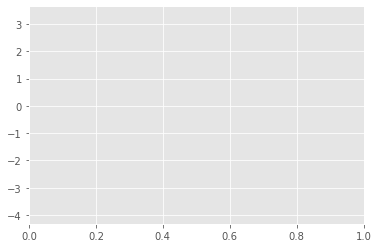

In [ ]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]
y_vec = np.random.randn(len(x_vec))
line1 = []
while True:
    rand_val = np.random.randn(1)
    y_vec[-1] = rand_val
    line1 = live_plotter(x_vec,y_vec,line1)
    y_vec = np.append(y_vec[1:],0.0)

In [3]:
import numpy as np
from matplotlib import pyplot as plt

class LivePlotNotebook(object):
    """
    Live plot using %matplotlib notebook in jupyter notebook
    
    Usage:
    ```
    import time
    liveplot = LivePlotNotebook()
    x=np.random.random((10,))
    for i in range(10):
        time.sleep(1)
        liveplot.update(
            x=x+np.random.random(x.shape)/10,
            actions=np.random.randint(0, 3, size=(10,))
        )
    ```
    
    url:
    """

    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1)
        
        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')
        
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')
        
        self.ax = ax
        self.fig = fig

    def update(self, x, actions):             
        # update price
        line = self.ax.lines[0]
        line.set_xdata(range(len(x)))
        line.set_ydata(x)
        
        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
        self.ax.set_xlim(0, len(actions))
        self.ax.set_ylim(x.min(), x.max())

        self.fig.canvas.draw()
        

<IPython.core.display.Javascript object>


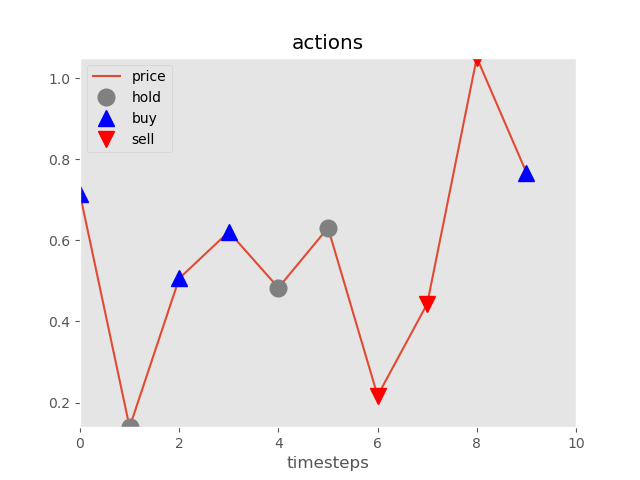

In [5]:
# Test
import time
liveplot = LivePlotNotebook()
x=np.random.random((10,))
for i in range(10):
    time.sleep(1)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,)))